In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
#import boto3

import pickle

#Data pull from AWS S3

In [ ]:
#access_key = {SECRET_KEY}
#secret_key = {SECRET_KEY}

In [ ]:
s3_client = boto3.client('s3',aws_access_key_id = access_key,aws_secret_access_key=secret_key)

In [ ]:
bucket = s3_client.list_buckets()
bucket

In [ ]:
data_s3 = s3_client.list_objects_v2(Bucket='zomatodatads')
data_s3

In [ ]:
'''
s3_client.download_file('zomatodatads','file1.json','file1.json')
s3_client.download_file('zomatodatads','file2.json','file2.json')
s3_client.download_file('zomatodatads','file3.json','file3.json')
s3_client.download_file('zomatodatads','file4.json','file4.json')
s3_client.download_file('zomatodatads','file5.json','file5.json')
'''

In [2]:
import json

with open('file1.json') as json_file:
    data = json.load(json_file)
with open('file2.json') as json_file2:
    data.extend(json.load(json_file2))
with open('file3.json') as json_file3:
    data.extend(json.load(json_file3))
with open('file4.json') as json_file4:
    data.extend(json.load(json_file4))
with open('file5.json') as json_file5:
    data.extend(json.load(json_file5))

In [3]:
print(type(data))
print(len(data))

<class 'list'>
2358


#Raw data exploration

In [4]:
data[1]

{'results_found': 4748,
 'restaurants': [{'restaurant': {'has_online_delivery': 0,
    'photos_url': 'https://www.zomato.com/kolkata/spice-kraft-ballygunge/photos?utm_source=api_basic_user&utm_medium=api&utm_campaign=v2.1#tabtop',
    'url': 'https://www.zomato.com/kolkata/spice-kraft-ballygunge?utm_source=api_basic_user&utm_medium=api&utm_campaign=v2.1',
    'price_range': 3,
    'apikey': 'b90e6a8c738410315a20c449fe2eb1b1',
    'user_rating': {'rating_text': 'Excellent',
     'rating_color': '3F7E00',
     'votes': '1424',
     'aggregate_rating': '4.8'},
    'R': {'res_id': 18017612},
    'name': 'Spice Kraft',
    'has_table_booking': 0,
    'is_delivering_now': 0,
    'deeplink': 'zomato://restaurant/18017612',
    'menu_url': 'https://www.zomato.com/kolkata/spice-kraft-ballygunge/menu?utm_source=api_basic_user&utm_medium=api&utm_campaign=v2.1&openSwipeBox=menu&showMinimal=1#tabtop',
    'average_cost_for_two': 1200,
    'switch_to_order_menu': 0,
    'offers': [],
    'cuisines':

In [5]:
data[30]['restaurants'][10]['restaurant']

{'has_online_delivery': 0,
 'photos_url': 'https://www.zomato.com/mangalore/giri-manjas-bhavathi/photos?utm_source=api_basic_user&utm_medium=api&utm_campaign=v2.1#tabtop',
 'url': 'https://www.zomato.com/mangalore/giri-manjas-bhavathi?utm_source=api_basic_user&utm_medium=api&utm_campaign=v2.1',
 'price_range': 2,
 'apikey': 'b90e6a8c738410315a20c449fe2eb1b1',
 'user_rating': {'rating_text': 'Very Good',
  'rating_color': '5BA829',
  'votes': '281',
  'aggregate_rating': '4.2'},
 'R': {'res_id': 3100142},
 'name': "Giri Manja's",
 'has_table_booking': 0,
 'is_delivering_now': 0,
 'deeplink': 'zomato://restaurant/3100142',
 'menu_url': 'https://www.zomato.com/mangalore/giri-manjas-bhavathi/menu?utm_source=api_basic_user&utm_medium=api&utm_campaign=v2.1&openSwipeBox=menu&showMinimal=1#tabtop',
 'average_cost_for_two': 500,
 'switch_to_order_menu': 0,
 'offers': [],
 'cuisines': 'Seafood',
 'location': {'latitude': '0.0000000000',
  'address': 'Near Kalikamba Temple, Gopalkrishna Temple Ro

In [6]:
data[35]['restaurants'][11]['restaurant']

{'has_online_delivery': 0,
 'photos_url': 'https://www.zomato.com/mysore/by-the-way-vijay-nagar/photos?utm_source=api_basic_user&utm_medium=api&utm_campaign=v2.1#tabtop',
 'url': 'https://www.zomato.com/mysore/by-the-way-vijay-nagar?utm_source=api_basic_user&utm_medium=api&utm_campaign=v2.1',
 'price_range': 2,
 'apikey': 'b90e6a8c738410315a20c449fe2eb1b1',
 'user_rating': {'rating_text': 'Good',
  'rating_color': '9ACD32',
  'votes': '190',
  'aggregate_rating': '3.6'},
 'R': {'res_id': 3600008},
 'name': 'By The Way',
 'has_table_booking': 0,
 'is_delivering_now': 0,
 'deeplink': 'zomato://restaurant/3600008',
 'menu_url': 'https://www.zomato.com/mysore/by-the-way-vijay-nagar/menu?utm_source=api_basic_user&utm_medium=api&utm_campaign=v2.1&openSwipeBox=menu&showMinimal=1#tabtop',
 'average_cost_for_two': 650,
 'switch_to_order_menu': 0,
 'offers': [],
 'cuisines': 'North Indian, Chinese, South Indian',
 'location': {'latitude': '12.3520583333',
  'address': 'Next to Bhartat Cancer Hos

In [7]:
data[0]['restaurants'][0]['restaurant']['currency']


'Rs.'

In [8]:
data[0]['restaurants'][0]['restaurant']['zomato_events'][0]['event']['photos'][0]['photo']['thumb_url']


'https://b.zmtcdn.com/data/zomato_events/photos/b73/ec1691986700e9839313d9353b2e4b73_1491382129.jpg?fit=around%7C100%3A100&crop=100%3A100%3B%2A%2C%2A'

In [9]:
data[0]['restaurants'][12]['restaurant']['thumb']

'https://b.zmtcdn.com/data/pictures/3/18157413/2c52bcf5b4e2e276130fed24b07416ab_featured_v2.jpg'

In [10]:

clm = {'id':[], 'url': [], 'thumb':[], 'price_range': [], 'name':[], 'cuisines':[], 'city':[], 'country_id':[], 'locality':[], 'rating':[], 'rating_votes':[], 'rating_text':[], 'rating_color':[], 'currency':[], 'average_cost_for_two':[] }
try:
  for i in data:
    if 'restaurants' in i:
      for ij in i['restaurants']:
          Z = ij['restaurant']

          clm['id'].append(Z['id'])
          clm['url'].append(Z['url'])
          clm['thumb'].append(Z['thumb'])
          clm['price_range'].append(Z['price_range'])
          clm['name'].append(Z['name'])
          clm['cuisines'].append(Z['cuisines'])
          clm['city'].append(Z['location']['city'])
          clm['country_id'].append(Z['location']['country_id'])
          clm['rating'].append(Z['user_rating']['aggregate_rating'])
          clm['rating_votes'].append(Z['user_rating']['votes'])
          clm['rating_text'].append(Z['user_rating']['rating_text'])
          clm['rating_color'].append(Z['user_rating']['rating_color'])
          clm['locality'].append(Z['location']['locality'])
          clm['currency'].append(Z['currency'])
          clm['average_cost_for_two'].append(Z['average_cost_for_two'])
          #print(clm)
except ValueError:
    pass
    print('pass')



In [11]:
df = pd.DataFrame(clm)
df

id                                                url  \
0        308322  https://www.zomato.com/HauzKhasSocial?utm_sour...   
1      18037817  https://www.zomato.com/ncr/qubitos-the-terrace...   
2        312345  https://www.zomato.com/ncr/the-hudson-cafe-del...   
3        307490  https://www.zomato.com/ncr/summer-house-cafe-h...   
4      18241537  https://www.zomato.com/ncr/38-barracks-connaug...   
...         ...                                                ...   
29748  17582627  https://www.zomato.com/pocatello-id/senor-igua...   
29749  17582625  https://www.zomato.com/pocatello-id/sandpiper-...   
29750  17582668  https://www.zomato.com/pocatello-id/texas-road...   
29751  17582498  https://www.zomato.com/pocatello-id/riverwalk-...   
29752  17582499  https://www.zomato.com/pocatello-id/royal-hote...   

                                                   thumb  price_range  \
0      https://b.zmtcdn.com/data/pictures/2/308322/cf...            3   
1      https://b.zmtcdn.com/data/pictures/7/18037817/...            3   
2      https://b.zmtcdn.com/data/pictures/5/312345/03...            2   
3      https://b.zmtcdn.com/data/pictures/0/307490/e0...            3   
4      https://b.zmtcdn.com/data/pictures/7/18241537/...            3   
...                                                  ...          ...   
29748                                                               1   
29749                                                               3   
29750  https://b.zmtcdn.com/data/pictures/chains/8/17...            3   
29751                                                               1   
29752                                                               1   

                                name  \
0                   Hauz Khas Social   
1         Qubitos - The Terrace Cafe   
2                    The Hudson Cafe   
3                  Summer House Cafe   
4                        38 Barracks   
...                              ...   
29748                  Senor Iguanas   
29749  Sandpiper Restaurant & Lounge   
29750                Texas Roadhouse   
29751                 Riverwalk Cafe   
29752                    Royal Hotel   

                                                cuisines       city  \
0             Continental, American, Asian, North Indian  New Delhi   
1      Thai, European, Mexican, North Indian, Chinese...  New Delhi   
2                    Cafe, Italian, Continental, Chinese  New Delhi   
3                                   Italian, Continental  New Delhi   
4                 North Indian, Italian, Asian, American  New Delhi   
...                                                  ...        ...   
29748                                            Mexican  Pocatello   
29749                           American, Seafood, Steak  Pocatello   
29750                               American, BBQ, Steak  Pocatello   
29751                                        Asian, Thai  Pocatello   
29752                                    Pizza, Bar Food  Pocatello   

       country_id                    locality rating rating_votes rating_text  \
0               1           Hauz Khas Village    4.3         7931   Very Good   
1               1              Rajouri Garden    4.5          778   Excellent   
2               1  Delhi University-GTB Nagar    4.4         1537   Very Good   
3               1                   Hauz Khas    4.1         1823   Very Good   
4               1             Connaught Place    4.4          840   Very Good   
...           ...                         ...    ...          ...         ...   
29748         216                   Pocatello    3.6          108        Good   
29749         216                   Pocatello    3.6           85        Good   
29750         216                    Chubbuck    3.5           83        Good   
29751         216            Lava Hot Springs    3.6           91        Good   
29752         216            Lava Hot Springs    3.6           59     

#Raw dataframe exploration

In [12]:
count = np.isinf(df['average_cost_for_two']).values.sum()
print("It contains " + str(count) + " infinite values")

It contains 0 infinite values


In [13]:
df.query('average_cost_for_two < 300')

id                                                url  \
155      801675  https://www.zomato.com/lucknow/frozen-factory-...   
264    18254231  https://www.zomato.com/indore/oye24-hig-lig?ut...   
281     1600205  https://www.zomato.com/nashik/sadhana-restaura...   
292     1600252  https://www.zomato.com/nashik/chai-tapri-colle...   
342     2200045  https://www.zomato.com/amritsar/the-kulcha-lan...   
...         ...                                                ...   
29748  17582627  https://www.zomato.com/pocatello-id/senor-igua...   
29749  17582625  https://www.zomato.com/pocatello-id/sandpiper-...   
29750  17582668  https://www.zomato.com/pocatello-id/texas-road...   
29751  17582498  https://www.zomato.com/pocatello-id/riverwalk-...   
29752  17582499  https://www.zomato.com/pocatello-id/royal-hote...   

                                                   thumb  price_range  \
155    https://b.zmtcdn.com/data/pictures/5/801675/36...            1   
264    https://b.zmtcdn.com/data/pictures/1/18254231/...            1   
281    https://b.zmtcdn.com/data/pictures/5/1600205/f...            1   
292    https://b.zmtcdn.com/data/pictures/2/1600252/0...            1   
342    https://b.zmtcdn.com/data/pictures/5/2200045/9...            1   
...                                                  ...          ...   
29748                                                               1   
29749                                                               3   
29750  https://b.zmtcdn.com/data/pictures/chains/8/17...            3   
29751                                                               1   
29752                                                               1   

                                name                             cuisines  \
155                   Frozen Factory                  Desserts, Ice Cream   
264                            Oye24  North Indian, Chinese, South Indian   
281               Sadhana Restaurant                        Maharashtrian   
292                       Chai Tapri                                 Cafe   
342                  The Kulcha Land            North Indian, Street Food   
...                              ...                                  ...   
29748                  Senor Iguanas                              Mexican   
29749  Sandpiper Restaurant & Lounge             American, Seafood, Steak   
29750                Texas Roadhouse                 American, BBQ, Steak   
29751                 Riverwalk Cafe                          Asian, Thai   
29752                    Royal Hotel                      Pizza, Bar Food   

            city  country_id          locality rating rating_votes  \
155      Lucknow           1       Gomti Nagar    4.5          144   
264       Indore           1           HIG-LIG    4.1          152   
281       Nashik           1            Satpur    3.9          218   
292       Nashik           1      College Road    3.4           86   
342     Amritsar           1     Ranjit Avenue    3.9          206   
...          ...         ...               ...    ...          ...   
29748  Pocatello         216         Pocatello    3.6          108   
29749  Pocatello         216         Pocatello    3.6           85   
29750  Pocatello         216          Chubbuck    3.5           83   
29751  Pocatello         216  Lava Hot Springs    3.6           91   
29752  Pocatello         216  Lava Hot Springs    3.6           59   

      rating_text rating_color currency  average_cost_for_two  
155     Excellent       3F7E00      Rs.                   200  
264     Very Good       5BA829      Rs.                   250  
281          Good       9ACD32      Rs.                   100  
292       Average       CDD614      Rs.                   150  
342          Good       9ACD32      Rs.                   200  
...           ...          ...      ...                   ...  
29748        Good       9ACD32        $                     0  
29749        Good

In [14]:
df.query('average_cost_for_two > 10000')

id                                                url  \
1120   18408381  https://www.zomato.com/jakarta/fish-streat-teb...   
1121    7422633  https://www.zomato.com/jakarta/talaga-sampireu...   
1122    7417455  https://www.zomato.com/jakarta/talaga-sampireu...   
1123   18352452  https://www.zomato.com/jakarta/lucky-cat-coffe...   
1124    7410290  https://www.zomato.com/jakarta/satoo-hotel-sha...   
...         ...                                                ...   
29238  18400530  https://www.zomato.com/bandung/noahs-barn-coff...   
29258  18400530  https://www.zomato.com/bandung/noahs-barn-coff...   
29278  18400530  https://www.zomato.com/bandung/noahs-barn-coff...   
29298  18400530  https://www.zomato.com/bandung/noahs-barn-coff...   
29318  18400530  https://www.zomato.com/bandung/noahs-barn-coff...   

                                                   thumb  price_range  \
1120   https://b.zmtcdn.com/data/pictures/chains/5/18...            3   
1121   https://b.zmtcdn.com/data/pictures/3/7422633/c...            3   
1122   https://b.zmtcdn.com/data/pictures/5/7417455/8...            3   
1123   https://b.zmtcdn.com/data/pictures/2/18352452/...            3   
1124   https://b.zmtcdn.com/data/pictures/0/7410290/7...            3   
...                                                  ...          ...   
29238  https://b.zmtcdn.com/data/pictures/0/18400530/...            3   
29258  https://b.zmtcdn.com/data/pictures/0/18400530/...            3   
29278  https://b.zmtcdn.com/data/pictures/0/18400530/...            3   
29298  https://b.zmtcdn.com/data/pictures/0/18400530/...            3   
29318  https://b.zmtcdn.com/data/pictures/0/18400530/...            3   

                             name                       cuisines     city  \
1120                  Fish Streat               Seafood, Western  Jakarta   
1121             Talaga Sampireun              Sunda, Indonesian  Jakarta   
1122             Talaga Sampireun              Sunda, Indonesian  Jakarta   
1123   Lucky Cat Coffee & Kitchen                  Cafe, Western  Jakarta   
1124     Satoo - Hotel Shangri-La     Asian, Indonesian, Western  Jakarta   
...                           ...                            ...      ...   
29238      Noah's Barn Coffeenery  Cafe, Coffee and Tea, Western  Bandung   
29258      Noah's Barn Coffeenery  Cafe, Coffee and Tea, Western  Bandung   
29278      Noah's Barn Coffeenery  Cafe, Coffee and Tea, Western  Bandung   
29298      Noah's Barn Coffeenery  Cafe, Coffee and Tea, Western  Bandung   
29318      Noah's Barn Coffeenery  Cafe, Coffee and Tea, Western  Bandung   

       country_id                        locality rating rating_votes  \
1120           94                           Tebet    4.0          331   
1121           94                      Cengkareng    4.9         1662   
1122           94  Taman Impian Jaya Ancol, Ancol    4.9         1640   
1123           94        Plaza Festival, Kuningan    4.3          458   
1124           94      Hotel Shangri-La, Sudirman    4.6          873   
...           ...                             ...    ...          ...   
29238          94                            Dago    4.2           22   
29258          94                            Dago    4.2           22   
29278          94                            Dago    4.2           22   
29298          94                            Dago    4.2           22   
29318          94                            Dago    4.2           22   

      rating_text rating_color currency  average_cost_for_two  
1120    Very Good       5BA829      IDR                100000  
1121    Excellent       3F7E00      IDR                200000  
1122    Excellent       3F7E00      IDR                200000  
1123    Very Good       5BA829      IDR                300000  
1124    Excellent       3F7E00      IDR                800000  
...           ...          ...      ...                   ...  
29238   Very Good       5BA829      IDR      

In [15]:
df.shape

(29753, 15)

In [16]:
df.query("currency != 'Rs.'")

id                                                url  \
720      210134  https://www.zomato.com/dubai/grand-barbeque-bu...   
721    18233284  https://www.zomato.com/dubai/farzi-cafe-al-saf...   
722    18269368  https://www.zomato.com/dubai/abs-absolute-barb...   
723      208939  https://www.zomato.com/dubai/abs-absolute-barb...   
724    18381837  https://www.zomato.com/dubai/spiceklub-mankhoo...   
...         ...                                                ...   
29748  17582627  https://www.zomato.com/pocatello-id/senor-igua...   
29749  17582625  https://www.zomato.com/pocatello-id/sandpiper-...   
29750  17582668  https://www.zomato.com/pocatello-id/texas-road...   
29751  17582498  https://www.zomato.com/pocatello-id/riverwalk-...   
29752  17582499  https://www.zomato.com/pocatello-id/royal-hote...   

                                                   thumb  price_range  \
720    https://b.zmtcdn.com/data/pictures/4/210134/31...            3   
721    https://b.zmtcdn.com/data/pictures/4/18233284/...            3   
722    https://b.zmtcdn.com/data/pictures/chains/9/20...            3   
723    https://b.zmtcdn.com/data/pictures/chains/9/20...            3   
724    https://b.zmtcdn.com/data/pictures/7/18381837/...            3   
...                                                  ...          ...   
29748                                                               1   
29749                                                               3   
29750  https://b.zmtcdn.com/data/pictures/chains/8/17...            3   
29751                                                               1   
29752                                                               1   

                                   name                           cuisines  \
720    Grand Barbeque Buffet Restaurant                      Indian, Asian   
721                          Farzi Cafe              International, Indian   
722             AB's Absolute Barbecues                Continental, Indian   
723             AB's Absolute Barbecues                Indian, Continental   
724                           SpiceKlub  Indian, North Indian, Street Food   
...                                 ...                                ...   
29748                     Senor Iguanas                            Mexican   
29749     Sandpiper Restaurant & Lounge           American, Seafood, Steak   
29750                   Texas Roadhouse               American, BBQ, Steak   
29751                    Riverwalk Cafe                        Asian, Thai   
29752                       Royal Hotel                    Pizza, Bar Food   

            city  country_id                locality rating rating_votes  \
720        Dubai         214                   Satwa    4.4          552   
721        Dubai         214      CITY WALK, Al Safa    4.5          909   
722        Dubai         214  Deira City Centre Area    4.9          641   
723        Dubai         214        Dubai Media City    4.8         2510   
724        Dubai         214                Mankhool    4.4          281   
...          ...         ...                     ...    ...          ...   
29748  Pocatello         216               Pocatello    3.6          108   
29749  Pocatello         216               Pocatello    3.6           85   
29750  Pocatello         216                Chubbuck    3.5           83   
29751  Pocatello         216        Lava Hot Springs    3.6           91   
29752  Pocatello         216        Lava Hot Springs    3.6           59   

      rating_text rating_color currency  average_cost_for_two  
720     Very Good       5BA829      AED                   150  
721     Excellent       3F7E00      AED                   200  
722     Excellent       3F7E00      AED                   160  
723     Excellent       3F7E00      AED                   160  
724     Very Good       5BA829      AED                   150  
...           ...          ...      ...                   ...

In [17]:
df.query("currency == 'Rs.'")

id                                                url  \
0        308322  https://www.zomato.com/HauzKhasSocial?utm_sour...   
1      18037817  https://www.zomato.com/ncr/qubitos-the-terrace...   
2        312345  https://www.zomato.com/ncr/the-hudson-cafe-del...   
3        307490  https://www.zomato.com/ncr/summer-house-cafe-h...   
4      18241537  https://www.zomato.com/ncr/38-barracks-connaug...   
...         ...                                                ...   
29311     13231  https://www.zomato.com/pune/le-plaisir-deccan-...   
29315  18385186  https://www.zomato.com/ahmedabad/the-cafe-bara...   
29316   2200000  https://www.zomato.com/amritsar/kesar-da-dhabh...   
29319  18224282  https://www.zomato.com/guwahati/three-guys-zoo...   
29331     13231  https://www.zomato.com/pune/le-plaisir-deccan-...   

                                                   thumb  price_range  \
0      https://b.zmtcdn.com/data/pictures/2/308322/cf...            3   
1      https://b.zmtcdn.com/data/pictures/7/18037817/...            3   
2      https://b.zmtcdn.com/data/pictures/5/312345/03...            2   
3      https://b.zmtcdn.com/data/pictures/0/307490/e0...            3   
4      https://b.zmtcdn.com/data/pictures/7/18241537/...            3   
...                                                  ...          ...   
29311  https://b.zmtcdn.com/data/pictures/1/13231/c0b...            3   
29315  https://b.zmtcdn.com/data/pictures/6/18385186/...            2   
29316  https://b.zmtcdn.com/data/pictures/0/2200000/a...            2   
29319  https://b.zmtcdn.com/data/pictures/2/18224282/...            2   
29331  https://b.zmtcdn.com/data/pictures/1/13231/c0b...            3   

                             name  \
0                Hauz Khas Social   
1      Qubitos - The Terrace Cafe   
2                 The Hudson Cafe   
3               Summer House Cafe   
4                     38 Barracks   
...                           ...   
29311                  Le Plaisir   
29315             The Cafe Baraco   
29316             Kesar Da Dhabha   
29319                  Three Guys   
29331                  Le Plaisir   

                                                cuisines       city  \
0             Continental, American, Asian, North Indian  New Delhi   
1      Thai, European, Mexican, North Indian, Chinese...  New Delhi   
2                    Cafe, Italian, Continental, Chinese  New Delhi   
3                                   Italian, Continental  New Delhi   
4                 North Indian, Italian, Asian, American  New Delhi   
...                                                  ...        ...   
29311                                 European, Desserts       Pune   
29315                                      Cafe, Italian  Ahmedabad   
29316                                       North Indian   Amritsar   
29319  Continental, North Indian, Chinese, Arabian, Thai   Guwahati   
29331                                 European, Desserts       Pune   

       country_id                    locality rating rating_votes rating_text  \
0               1           Hauz Khas Village    4.3         7931   Very Good   
1               1              Rajouri Garden    4.5          778   Excellent   
2               1  Delhi University-GTB Nagar    4.4         1537   Very Good   
3               1                   Hauz Khas    4.1         1823   Very Good   
4               1             Connaught Place    4.4          840   Very Good   
...           ...                         ...    ...          ...         ...   
29311           1             Deccan Gymkhana    4.8         2510   Excellent   
29315           1                 Navrangpura    4.4          317   Very Good   
29316           1                   Town Hall    4.1          878   Very Good   
29319           1                 Zoo Tiniali    4.3          233   Very Good   
29331           1             Deccan Gymkhana    4.8         2510   Excellent   

      rating_color curre

In [18]:
df

id                                                url  \
0        308322  https://www.zomato.com/HauzKhasSocial?utm_sour...   
1      18037817  https://www.zomato.com/ncr/qubitos-the-terrace...   
2        312345  https://www.zomato.com/ncr/the-hudson-cafe-del...   
3        307490  https://www.zomato.com/ncr/summer-house-cafe-h...   
4      18241537  https://www.zomato.com/ncr/38-barracks-connaug...   
...         ...                                                ...   
29748  17582627  https://www.zomato.com/pocatello-id/senor-igua...   
29749  17582625  https://www.zomato.com/pocatello-id/sandpiper-...   
29750  17582668  https://www.zomato.com/pocatello-id/texas-road...   
29751  17582498  https://www.zomato.com/pocatello-id/riverwalk-...   
29752  17582499  https://www.zomato.com/pocatello-id/royal-hote...   

                                                   thumb  price_range  \
0      https://b.zmtcdn.com/data/pictures/2/308322/cf...            3   
1      https://b.zmtcdn.com/data/pictures/7/18037817/...            3   
2      https://b.zmtcdn.com/data/pictures/5/312345/03...            2   
3      https://b.zmtcdn.com/data/pictures/0/307490/e0...            3   
4      https://b.zmtcdn.com/data/pictures/7/18241537/...            3   
...                                                  ...          ...   
29748                                                               1   
29749                                                               3   
29750  https://b.zmtcdn.com/data/pictures/chains/8/17...            3   
29751                                                               1   
29752                                                               1   

                                name  \
0                   Hauz Khas Social   
1         Qubitos - The Terrace Cafe   
2                    The Hudson Cafe   
3                  Summer House Cafe   
4                        38 Barracks   
...                              ...   
29748                  Senor Iguanas   
29749  Sandpiper Restaurant & Lounge   
29750                Texas Roadhouse   
29751                 Riverwalk Cafe   
29752                    Royal Hotel   

                                                cuisines       city  \
0             Continental, American, Asian, North Indian  New Delhi   
1      Thai, European, Mexican, North Indian, Chinese...  New Delhi   
2                    Cafe, Italian, Continental, Chinese  New Delhi   
3                                   Italian, Continental  New Delhi   
4                 North Indian, Italian, Asian, American  New Delhi   
...                                                  ...        ...   
29748                                            Mexican  Pocatello   
29749                           American, Seafood, Steak  Pocatello   
29750                               American, BBQ, Steak  Pocatello   
29751                                        Asian, Thai  Pocatello   
29752                                    Pizza, Bar Food  Pocatello   

       country_id                    locality rating rating_votes rating_text  \
0               1           Hauz Khas Village    4.3         7931   Very Good   
1               1              Rajouri Garden    4.5          778   Excellent   
2               1  Delhi University-GTB Nagar    4.4         1537   Very Good   
3               1                   Hauz Khas    4.1         1823   Very Good   
4               1             Connaught Place    4.4          840   Very Good   
...           ...                         ...    ...          ...         ...   
29748         216                   Pocatello    3.6          108        Good   
29749         216                   Pocatello    3.6           85        Good   
29750         216                    Chubbuck    3.5           83        Good   
29751         216            Lava Hot Springs    3.6           91        Good   
29752         216            Lava Hot Springs    3.6           59     

In [19]:
df['name'].value_counts()

name
Barbeque Nation           419
Noah's Barn Coffeenery    337
Punjab Grill              271
Three Guys                229
Mocha                     195
                         ... 
Burnt Toast Cafe            1
Los Beto's                  1
Flying Pie Pizzaria         1
Barbacoa Restaurant         1
Indian Grill Room           1
Name: count, Length: 7469, dtype: int64

In [20]:
df['name'].nunique()

7469

In [21]:
df['currency'].value_counts()

currency
Rs.    20503
$       8109
P        384
IDR      357
£         80
R$        60
R         60
AED       60
TL        40
NZ$       40
LKR       20
QR        20
          20
Name: count, dtype: int64

In [22]:
df.query('''name == "Noah's Barn Coffeenery"''')

id                                                url  \
11791  18400530  https://www.zomato.com/bandung/noahs-barn-coff...   
11811  18400530  https://www.zomato.com/bandung/noahs-barn-coff...   
11831  18400530  https://www.zomato.com/bandung/noahs-barn-coff...   
11851  18400530  https://www.zomato.com/bandung/noahs-barn-coff...   
11871  18400530  https://www.zomato.com/bandung/noahs-barn-coff...   
...         ...                                                ...   
29238  18400530  https://www.zomato.com/bandung/noahs-barn-coff...   
29258  18400530  https://www.zomato.com/bandung/noahs-barn-coff...   
29278  18400530  https://www.zomato.com/bandung/noahs-barn-coff...   
29298  18400530  https://www.zomato.com/bandung/noahs-barn-coff...   
29318  18400530  https://www.zomato.com/bandung/noahs-barn-coff...   

                                                   thumb  price_range  \
11791  https://b.zmtcdn.com/data/pictures/0/18400530/...            3   
11811  https://b.zmtcdn.com/data/pictures/0/18400530/...            3   
11831  https://b.zmtcdn.com/data/pictures/0/18400530/...            3   
11851  https://b.zmtcdn.com/data/pictures/0/18400530/...            3   
11871  https://b.zmtcdn.com/data/pictures/0/18400530/...            3   
...                                                  ...          ...   
29238  https://b.zmtcdn.com/data/pictures/0/18400530/...            3   
29258  https://b.zmtcdn.com/data/pictures/0/18400530/...            3   
29278  https://b.zmtcdn.com/data/pictures/0/18400530/...            3   
29298  https://b.zmtcdn.com/data/pictures/0/18400530/...            3   
29318  https://b.zmtcdn.com/data/pictures/0/18400530/...            3   

                         name                       cuisines     city  \
11791  Noah's Barn Coffeenery  Cafe, Coffee and Tea, Western  Bandung   
11811  Noah's Barn Coffeenery  Cafe, Coffee and Tea, Western  Bandung   
11831  Noah's Barn Coffeenery  Cafe, Coffee and Tea, Western  Bandung   
11851  Noah's Barn Coffeenery  Cafe, Coffee and Tea, Western  Bandung   
11871  Noah's Barn Coffeenery  Cafe, Coffee and Tea, Western  Bandung   
...                       ...                            ...      ...   
29238  Noah's Barn Coffeenery  Cafe, Coffee and Tea, Western  Bandung   
29258  Noah's Barn Coffeenery  Cafe, Coffee and Tea, Western  Bandung   
29278  Noah's Barn Coffeenery  Cafe, Coffee and Tea, Western  Bandung   
29298  Noah's Barn Coffeenery  Cafe, Coffee and Tea, Western  Bandung   
29318  Noah's Barn Coffeenery  Cafe, Coffee and Tea, Western  Bandung   

       country_id locality rating rating_votes rating_text rating_color  \
11791          94     Dago    4.2           22   Very Good       5BA829   
11811          94     Dago    4.2           22   Very Good       5BA829   
11831          94     Dago    4.2           22   Very Good       5BA829   
11851          94     Dago    4.2           22   Very Good       5BA829   
11871          94     Dago    4.2           22   Very Good       5BA829   
...           ...      ...    ...          ...         ...          ...   
29238          94     Dago    4.2           22   Very Good       5BA829   
29258          94     Dago    4.2           22   Very Good       5BA829   
29278          94     Dago    4.2           22   Very Good       5BA829   
29298          94     Dago    4.2           22   Very Good       5BA829   
29318          94     Dago    4.2           22   Very Good       5BA829   

      currency  average_cost_for_two  
11791      IDR                150000  
11811      IDR                150000  
11831      IDR                150000  
11851      IDR                150000  
11871      IDR                150000  
...        ...                   ...  
29238      IDR                150000  
29258      IDR                150000  
29278      IDR                150000  
29298      IDR                150000  
29318      IDR                150000  

[337 rows x 15 columns]

In [23]:
df['rating_votes'].isnull().sum()

np.int64(0)

In [24]:
df['rating_votes'].value_counts()

rating_votes
0       1457
1        700
29       614
2        608
6        602
        ... 
755        1
1014       1
906        1
680        1
690        1
Name: count, Length: 1015, dtype: int64

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29753 entries, 0 to 29752
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    29753 non-null  object
 1   url                   29753 non-null  object
 2   thumb                 29753 non-null  object
 3   price_range           29753 non-null  int64 
 4   name                  29753 non-null  object
 5   cuisines              29753 non-null  object
 6   city                  29753 non-null  object
 7   country_id            29753 non-null  int64 
 8   locality              29753 non-null  object
 9   rating                29753 non-null  object
 10  rating_votes          29753 non-null  object
 11  rating_text           29753 non-null  object
 12  rating_color          29753 non-null  object
 13  currency              29753 non-null  object
 14  average_cost_for_two  29753 non-null  int64 
dtypes: int64(3), object(12)
memory usage

In [27]:
df['city'].nunique()

142

In [28]:
df['cuisines'].value_counts()

cuisines
North Indian                     1963
Cafe                              895
North Indian, Chinese             854
North Indian, Mughlai             783
Chinese                           515
                                 ... 
Tex-Mex, American                   1
International, Pizza                1
American, BBQ, Seafood              1
Asian, Vegetarian, Vietnamese       1
Caribbean, Mexican, Cajun           1
Name: count, Length: 1835, dtype: int64

In [29]:
df['city'].value_counts()

city
New Delhi        12362
Noida             2885
Gurgaon           2052
Guwahati           592
Lucknow            398
                 ...  
Quezon City          1
Mohali               1
Tagaytay City        1
Randburg             1
Panchkula            1
Name: count, Length: 142, dtype: int64

In [30]:
df.shape

(29753, 15)

In [31]:
df.isnull().sum()

id                      0
url                     0
thumb                   0
price_range             0
name                    0
cuisines                0
city                    0
country_id              0
locality                0
rating                  0
rating_votes            0
rating_text             0
rating_color            0
currency                0
average_cost_for_two    0
dtype: int64

In [32]:
df2 = df.drop_duplicates()

In [33]:
df2

id                                                url  \
0        308322  https://www.zomato.com/HauzKhasSocial?utm_sour...   
1      18037817  https://www.zomato.com/ncr/qubitos-the-terrace...   
2        312345  https://www.zomato.com/ncr/the-hudson-cafe-del...   
3        307490  https://www.zomato.com/ncr/summer-house-cafe-h...   
4      18241537  https://www.zomato.com/ncr/38-barracks-connaug...   
...         ...                                                ...   
29748  17582627  https://www.zomato.com/pocatello-id/senor-igua...   
29749  17582625  https://www.zomato.com/pocatello-id/sandpiper-...   
29750  17582668  https://www.zomato.com/pocatello-id/texas-road...   
29751  17582498  https://www.zomato.com/pocatello-id/riverwalk-...   
29752  17582499  https://www.zomato.com/pocatello-id/royal-hote...   

                                                   thumb  price_range  \
0      https://b.zmtcdn.com/data/pictures/2/308322/cf...            3   
1      https://b.zmtcdn.com/data/pictures/7/18037817/...            3   
2      https://b.zmtcdn.com/data/pictures/5/312345/03...            2   
3      https://b.zmtcdn.com/data/pictures/0/307490/e0...            3   
4      https://b.zmtcdn.com/data/pictures/7/18241537/...            3   
...                                                  ...          ...   
29748                                                               1   
29749                                                               3   
29750  https://b.zmtcdn.com/data/pictures/chains/8/17...            3   
29751                                                               1   
29752                                                               1   

                                name  \
0                   Hauz Khas Social   
1         Qubitos - The Terrace Cafe   
2                    The Hudson Cafe   
3                  Summer House Cafe   
4                        38 Barracks   
...                              ...   
29748                  Senor Iguanas   
29749  Sandpiper Restaurant & Lounge   
29750                Texas Roadhouse   
29751                 Riverwalk Cafe   
29752                    Royal Hotel   

                                                cuisines       city  \
0             Continental, American, Asian, North Indian  New Delhi   
1      Thai, European, Mexican, North Indian, Chinese...  New Delhi   
2                    Cafe, Italian, Continental, Chinese  New Delhi   
3                                   Italian, Continental  New Delhi   
4                 North Indian, Italian, Asian, American  New Delhi   
...                                                  ...        ...   
29748                                            Mexican  Pocatello   
29749                           American, Seafood, Steak  Pocatello   
29750                               American, BBQ, Steak  Pocatello   
29751                                        Asian, Thai  Pocatello   
29752                                    Pizza, Bar Food  Pocatello   

       country_id                    locality rating rating_votes rating_text  \
0               1           Hauz Khas Village    4.3         7931   Very Good   
1               1              Rajouri Garden    4.5          778   Excellent   
2               1  Delhi University-GTB Nagar    4.4         1537   Very Good   
3               1                   Hauz Khas    4.1         1823   Very Good   
4               1             Connaught Place    4.4          840   Very Good   
...           ...                         ...    ...          ...         ...   
29748         216                   Pocatello    3.6          108        Good   
29749         216                   Pocatello    3.6           85        Good   
29750         216                    Chubbuck    3.5           83        Good   
29751         216            Lava Hot Springs    3.6           91        Good   
29752         216            Lava Hot Springs    3.6           59     

In [34]:
#df2 = df.drop(['id', 'url', 'thumb', 'price_range', 'country_id', 'rating_votes', 'rating_color'],axis='columns')
df2 = df2.drop(['id', 'url', 'locality', 'thumb',  'country_id',  'rating_color', 'rating_text'],axis='columns')

#df - df raw

In [35]:
df2['rating_votes'] = df2['rating_votes'].apply(lambda x: int(x))
df2['rating'] = df2['rating'].apply(lambda x: float(x))

<Axes: xlabel='price_range', ylabel='average_cost_for_two'>

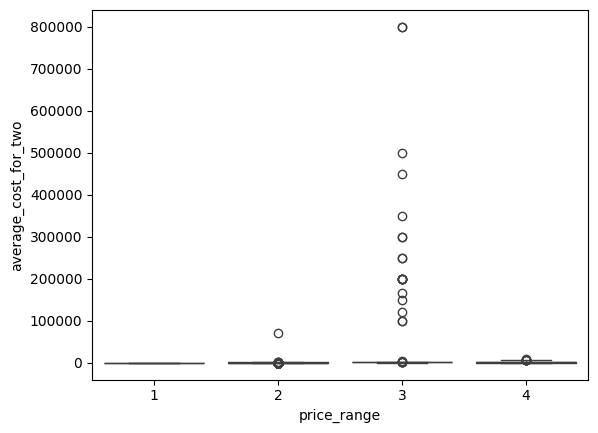

In [36]:
sns.boxplot(x = 'price_range', y ='average_cost_for_two', data=df2)

In [37]:
df2.shape

(9577, 8)

In [38]:
df2.query("price_range == 4")['rating_votes']

6         2093
7         2412
8         1942
11        4385
61       10934
         ...  
29620      201
29650       58
29711       72
29722      538
29727      379
Name: rating_votes, Length: 607, dtype: int64

In [39]:
df2.query("average_cost_for_two > 3000 and currency == 'Rs.'").head(20)

price_range                                      name  \
596             4              Dawat-e-Nawab - Radisson Blu   
1344            4                        7 Degrees Brauhaus   
1359            4                            Masala Library   
1460            4              Le Cirque - The Leela Palace   
1462            4  Tian - Asian Cuisine Studio - ITC Maurya   
1463            4                Jamavar - The Leela Palace   
1464            4                   MEGU - The Leela Palace   
1469            4         Orient Express - Taj Palace Hotel   
1473            4                      Frontier - The Ashok   
1474            4                      The Oudh - The Ashok   
1479            4                     Golf Bar - ITC Maurya   
1673            4            Club BW - The Suryaa New Delhi   
1811            4          Oval Bar - JW Marriott New Delhi   
1814            4               Chidya Ghar - Roseate House   
1935            4               Larry's China - Taj Vivanta   
2300            4                       Blooms - Eros Hotel   
2302            4             Empress of China - Eros Hotel   
2304            4                                      Hype   
2696            4                 La Piazza - Hyatt Regency   
2697            4             China Kitchen - Hyatt Regency   

                                              cuisines       city  rating  \
596                              North Indian, Mughlai       Agra     3.8   
1344  Continental, North Indian, European, Finger Food    Gurgaon     4.2   
1359                                     Modern Indian  New Delhi     4.9   
1460                                   French, Italian  New Delhi     3.8   
1462            Asian, Japanese, Korean, Thai, Chinese  New Delhi     4.1   
1463                             North Indian, Mughlai  New Delhi     3.9   
1464                                   Japanese, Sushi  New Delhi     3.9   
1469                                          European  New Delhi     4.0   
1473                             North Indian, Mughlai  New Delhi     3.7   
1474                                      North Indian  New Delhi     3.6   
1479                                       Drinks Only  New Delhi     3.5   
1673        Finger Food, Continental, Italian, Chinese  New Delhi     3.6   
1811                                       Finger Food  New Delhi     3.3   
1814                                       Continental  New Delhi     2.9   
1935                                           Chinese  New Delhi     3.7   
2300                Continental, North Indian, Italian  New Delhi     3.9   
2302                                           Chinese  New Delhi     4.2   
2304              Finger Food, Italian, Middle Eastern  New Delhi     3.7   
2696                                           Italian  New Delhi     3.9   
2697                                           Chinese  New Delhi     4.0   

      rating_votes currency  average_cost_for_two  
596             46      Rs.                  3600  
1344          1193      Rs.                  3200  
1359           408      Rs.                  5000  
1460           199      Rs.                  5000  
1462           188      Rs.                  7000  
1463           241      Rs.                  4000  
1464           178      Rs.                  5500  
1469           145      Rs.                  8000  
1473           101      Rs.                  3600  
1474           100      Rs.                  3700  
1479            45      Rs.                  3500  
1673            90      Rs.                  4400  
1811            15      Rs.                  4500  
1814             4      Rs.                  3700  
1935           147      Rs.                  3200  
2300           150      Rs.                  4000  
2302           119      Rs.                  4800  
2304           142      Rs.                  4700  
2696           410      Rs.                  4500  
2697           424      

In [40]:
df2.query("price_range == 5")

Empty DataFrame
Columns: [price_range, name, cuisines, city, rating, rating_votes, currency, average_cost_for_two]
Index: []

In [41]:
df2.query('rating_votes == 0')

price_range                        name  \
999              2            Cantinho da Gula   
1080             4  The Golconda Bowl - hilton   
1081             4                   Mc Donald   
1082             4           Daawat Restaurant   
1083             4             Salt Water Cafe   
...            ...                         ...   
28103            2                   The Dhaba   
28107            2                      Subway   
28120            1                Spicy Affair   
28487            1                     Ahmed's   
28488            1      Mittal Bikaneri Sweets   

                                       cuisines       city  rating  \
999                                   Brazilian  São Paulo     0.0   
1080                      North Indian, Biryani      Dummy     0.0   
1081                                  Fast Food      Dummy     0.0   
1082                               North Indian      Dummy     0.0   
1083                North Indian, Chinese, Cafe      Dummy     0.0   
...                                         ...        ...     ...   
28103                              North Indian      Noida     0.0   
28107  American, Fast Food, Salad, Healthy Food      Noida     0.0   
28120                               Street Food      Noida     0.0   
28487                                   Mughlai      Noida     0.0   
28488                       Mithai, Street Food      Noida     0.0   

       rating_votes currency  average_cost_for_two  
999               0       R$                    55  
1080              0                           2500  
1081              0                            500  
1082              0                            600  
1083              0                           1500  
...             ...      ...                   ...  
28103             0      Rs.                   500  
28107             0      Rs.                   500  
28120             0      Rs.                   150  
28487             0      Rs.                   200  
28488             0      Rs.                   100  

[1114 rows x 8 columns]

In [42]:
df3 = df2.query(" currency == 'Rs.'")

In [43]:
df3.query("average_cost_for_two > 3000 and currency == 'Rs.'").head(20)

price_range                                      name  \
596             4              Dawat-e-Nawab - Radisson Blu   
1344            4                        7 Degrees Brauhaus   
1359            4                            Masala Library   
1460            4              Le Cirque - The Leela Palace   
1462            4  Tian - Asian Cuisine Studio - ITC Maurya   
1463            4                Jamavar - The Leela Palace   
1464            4                   MEGU - The Leela Palace   
1469            4         Orient Express - Taj Palace Hotel   
1473            4                      Frontier - The Ashok   
1474            4                      The Oudh - The Ashok   
1479            4                     Golf Bar - ITC Maurya   
1673            4            Club BW - The Suryaa New Delhi   
1811            4          Oval Bar - JW Marriott New Delhi   
1814            4               Chidya Ghar - Roseate House   
1935            4               Larry's China - Taj Vivanta   
2300            4                       Blooms - Eros Hotel   
2302            4             Empress of China - Eros Hotel   
2304            4                                      Hype   
2696            4                 La Piazza - Hyatt Regency   
2697            4             China Kitchen - Hyatt Regency   

                                              cuisines       city  rating  \
596                              North Indian, Mughlai       Agra     3.8   
1344  Continental, North Indian, European, Finger Food    Gurgaon     4.2   
1359                                     Modern Indian  New Delhi     4.9   
1460                                   French, Italian  New Delhi     3.8   
1462            Asian, Japanese, Korean, Thai, Chinese  New Delhi     4.1   
1463                             North Indian, Mughlai  New Delhi     3.9   
1464                                   Japanese, Sushi  New Delhi     3.9   
1469                                          European  New Delhi     4.0   
1473                             North Indian, Mughlai  New Delhi     3.7   
1474                                      North Indian  New Delhi     3.6   
1479                                       Drinks Only  New Delhi     3.5   
1673        Finger Food, Continental, Italian, Chinese  New Delhi     3.6   
1811                                       Finger Food  New Delhi     3.3   
1814                                       Continental  New Delhi     2.9   
1935                                           Chinese  New Delhi     3.7   
2300                Continental, North Indian, Italian  New Delhi     3.9   
2302                                           Chinese  New Delhi     4.2   
2304              Finger Food, Italian, Middle Eastern  New Delhi     3.7   
2696                                           Italian  New Delhi     3.9   
2697                                           Chinese  New Delhi     4.0   

      rating_votes currency  average_cost_for_two  
596             46      Rs.                  3600  
1344          1193      Rs.                  3200  
1359           408      Rs.                  5000  
1460           199      Rs.                  5000  
1462           188      Rs.                  7000  
1463           241      Rs.                  4000  
1464           178      Rs.                  5500  
1469           145      Rs.                  8000  
1473           101      Rs.                  3600  
1474           100      Rs.                  3700  
1479            45      Rs.                  3500  
1673            90      Rs.                  4400  
1811            15      Rs.                  4500  
1814             4      Rs.                  3700  
1935           147      Rs.                  3200  
2300           150      Rs.                  4000  
2302           119      Rs.                  4800  
2304           142      Rs.                  4700  
2696           410      Rs.                  4500  
2697           424      

In [44]:
#df2 = df2.drop(df2[df2["average_cost_for_two"] > float(10000)].index)

In [45]:

df2 = df2.drop(df2[df2["cuisines"] == ''].index)
df2 = df2.drop(df2[df2["name"] == 'dummy'].index)
df2 = df2.drop(df2[df2["average_cost_for_two"] == 0].index)


#df2 = df2.drop(df2[df2["rating_votes"] == 0].index)
#df2 = df2.drop(df2[df2["rating"] == (0)].index)
#df2 = df2.drop(df2[df2["rating_votes"] > float(600)].index)


In [46]:
df3.shape

(8652, 8)

#Clean rating

In [47]:
df4 = df3.drop(['name' , 'city', 'cuisines', 'currency',],axis='columns')

In [48]:
df3_zero_rating = df3.query("rating == 0 ")

In [49]:
df3_zero_rating

price_range                        name             cuisines  \
1613             2  Test Restaruants for Medio    Chinese, Lucknowi   
1734             1      HoG - House of Goodies     Bakery, Desserts   
1738             2               Pastry Palace               Bakery   
1739             1   The Pirates Of China Town              Chinese   
1809             3           Roasted - Roseate         Cafe, Bakery   
...            ...                         ...                  ...   
28113            1              Choicest Cakes               Bakery   
28120            1                Spicy Affair          Street Food   
28122            2             The Bakery Mart               Bakery   
28487            1                     Ahmed's              Mughlai   
28488            1      Mittal Bikaneri Sweets  Mithai, Street Food   

            city  rating  rating_votes currency  average_cost_for_two  
1613   New Delhi     0.0             1      Rs.                   800  
1734   New Delhi     0.0             3      Rs.                   350  
1738   New Delhi     0.0             2      Rs.                   500  
1739   New Delhi     0.0             3      Rs.                   350  
1809   New Delhi     0.0             3      Rs.                  1000  
...          ...     ...           ...      ...                   ...  
28113      Noida     0.0             2      Rs.                   300  
28120      Noida     0.0             0      Rs.                   150  
28122      Noida     0.0             1      Rs.                   800  
28487      Noida     0.0             0      Rs.                   200  
28488      Noida     0.0             0      Rs.                   100  

[2139 rows x 8 columns]

In [50]:
df3_zero_rating = df3_zero_rating.drop(['name' , 'city', 'cuisines', 'currency'],axis='columns')

In [51]:
df3_rating = df3.drop(df3[df3["rating"] == 0].index)
df3_rating = df3_rating.drop(df3_rating[df3_rating["rating_votes"] == 0].index)

In [52]:
df3

price_range                        name  \
0                3            Hauz Khas Social   
1                3  Qubitos - The Terrace Cafe   
2                2             The Hudson Cafe   
3                3           Summer House Cafe   
4                3                 38 Barracks   
...            ...                         ...   
28124            2             Sam and Scrooge   
28125            3                  Chawla's 2   
28487            1                     Ahmed's   
28488            1      Mittal Bikaneri Sweets   
28490            1                     Burnout   

                                                cuisines       city  rating  \
0             Continental, American, Asian, North Indian  New Delhi     4.3   
1      Thai, European, Mexican, North Indian, Chinese...  New Delhi     4.5   
2                    Cafe, Italian, Continental, Chinese  New Delhi     4.4   
3                                   Italian, Continental  New Delhi     4.1   
4                 North Indian, Italian, Asian, American  New Delhi     4.4   
...                                                  ...        ...     ...   
28124  Continental, Mexican, American, Fast Food, Ita...      Noida     3.9   
28125                     North Indian, Mughlai, Chinese      Noida     2.1   
28487                                            Mughlai      Noida     0.0   
28488                                Mithai, Street Food      Noida     0.0   
28490                      Continental, Mexican, Italian      Noida     3.6   

       rating_votes currency  average_cost_for_two  
0              7931      Rs.                  1600  
1               778      Rs.                  1500  
2              1537      Rs.                   850  
3              1823      Rs.                  1850  
4               840      Rs.                  1600  
...             ...      ...                   ...  
28124           132      Rs.                   550  
28125            22      Rs.                  1400  
28487             0      Rs.                   200  
28488             0      Rs.                   100  
28490           111      Rs.                   450  

[8652 rows x 8 columns]

In [53]:
df3_rating = df3_rating.drop(['name' , 'city', 'cuisines', 'currency'],axis='columns')

In [54]:
df3_rating

price_range  rating  rating_votes  average_cost_for_two
0                3     4.3          7931                  1600
1                3     4.5           778                  1500
2                2     4.4          1537                   850
3                3     4.1          1823                  1850
4                3     4.4           840                  1600
...            ...     ...           ...                   ...
28119            2     3.0             5                   500
28121            1     2.9             4                   300
28124            2     3.9           132                   550
28125            3     2.1            22                  1400
28490            1     3.6           111                   450

[6513 rows x 4 columns]

In [55]:
df3_rating['rating'] = df3_rating.pop('rating') #moving selling_price to last column

In [56]:
df4 = df3_rating.copy()

In [57]:
scaler = MinMaxScaler()

#input param = array-like of shape (n_samples, n_features)
df_for_scalar = df4.drop('rating', axis = 'columns')

df_minmax_scaled = df4.copy()

scaler.fit(df_for_scalar[df_for_scalar.columns])
minmaxscaler = scaler


#transform valus
df_minmax_scaled[df_for_scalar.columns] = scaler.transform(df_for_scalar[df_for_scalar.columns])
display(df_minmax_scaled)



price_range  rating_votes  average_cost_for_two  rating
0         0.666667      0.725252               0.20000     4.3
1         0.666667      0.070814               0.18750     4.5
2         0.333333      0.140256               0.10625     4.4
3         0.666667      0.166423               0.23125     4.1
4         0.666667      0.076487               0.20000     4.4
...            ...           ...                   ...     ...
28119     0.333333      0.000091               0.06250     3.0
28121     0.000000      0.000000               0.03750     2.9
28124     0.333333      0.011711               0.06875     3.9
28125     0.666667      0.001647               0.17500     2.1
28490     0.000000      0.009790               0.05625     3.6

[6513 rows x 4 columns]

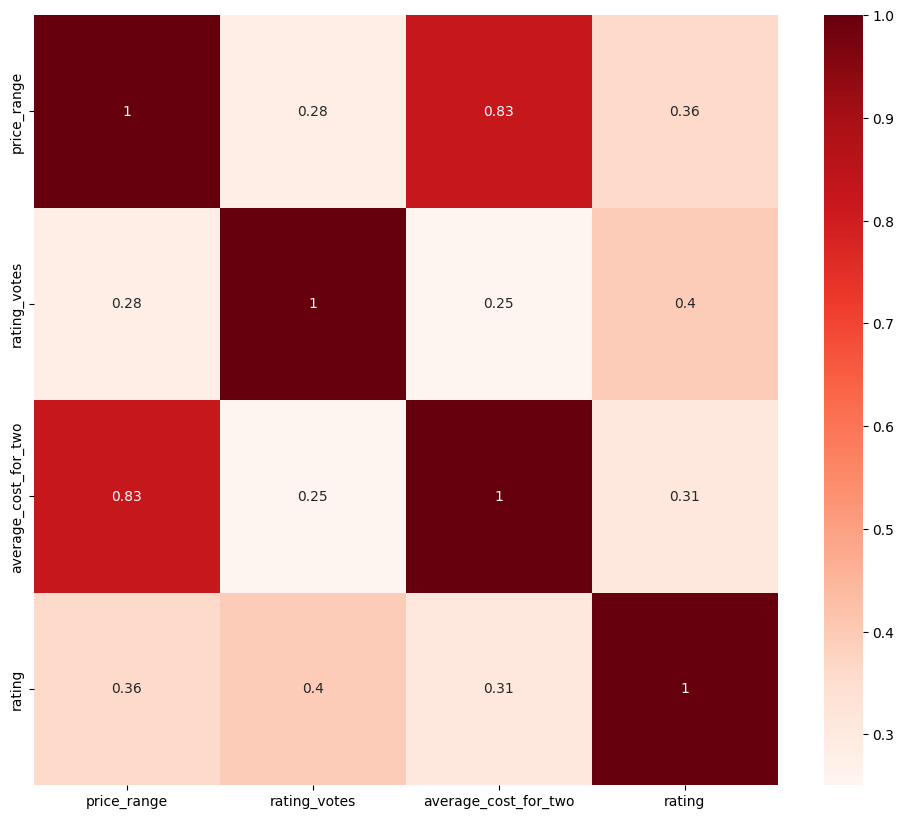

In [58]:
plt.figure(figsize=(12,10))
cor = df_minmax_scaled.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

#model training for zero ratings

In [59]:

X = df_minmax_scaled.drop('rating', axis = 1)
Y = df_minmax_scaled['rating']

X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y, test_size = 0.3, random_state = 43)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(4559, 3)
(1954, 3)
(4559,)
(1954,)


In [60]:
from sklearn import metrics
# Model creation, prediction

def training(model,X_train,y_train,X_test,y_test):

  model.fit(X_train, y_train)
  #print('Coefficients: \n', model.coef_)
  train_y_pred = model.predict(X_train)
  test_y_pred = model.predict(X_test)

  xytest = y_test - test_y_pred
  xytestper = (xytest/Y_test)*100
  xytestper

  xytrain = y_train - train_y_pred
  xytrainper = (xytrain/Y_train)*100
  xytrainper



  print('Test data metrics')
  print('MAE:', metrics.mean_absolute_error(y_test, test_y_pred))
  print('MSE:', metrics.mean_squared_error(y_test, test_y_pred))
  print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, test_y_pred)))
  print('R2:',metrics.explained_variance_score(y_test, test_y_pred))
  print('Error % :', xytestper.sum()/xytestper.shape[0], ' %')

  print('\nTrain data metrics')
  print('MAE:', metrics.mean_absolute_error(y_train, train_y_pred))
  print('MSE:', metrics.mean_squared_error(y_train, train_y_pred))
  print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, train_y_pred)))
  print('R2:',metrics.explained_variance_score(y_train, train_y_pred))

  print('Error % :', xytrainper.sum()/xytrainper.shape[0], ' %')



In [61]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

training(lm,X_train, Y_train,X_test,Y_test)

Test data metrics
MAE: 0.348706983373281
MSE: 0.1941647871564227
RMSE: 0.44064133618672535
R2: 0.22210835021339648
Error % : -1.8456639747954988  %

Train data metrics
MAE: 0.34694619210003835
MSE: 0.1994604331904218
RMSE: 0.4466099340480704
R2: 0.22340589684043333
Error % : -1.8889242107325068  %


In [62]:
df3_rating

price_range  rating_votes  average_cost_for_two  rating
0                3          7931                  1600     4.3
1                3           778                  1500     4.5
2                2          1537                   850     4.4
3                3          1823                  1850     4.1
4                3           840                  1600     4.4
...            ...           ...                   ...     ...
28119            2             5                   500     3.0
28121            1             4                   300     2.9
28124            2           132                   550     3.9
28125            3            22                  1400     2.1
28490            1           111                   450     3.6

[6513 rows x 4 columns]

In [63]:
df3_zero_rating['rating'] = df3_zero_rating.pop('rating')

In [64]:
df3_zero_rating

price_range  rating_votes  average_cost_for_two  rating
1613             2             1                   800     0.0
1734             1             3                   350     0.0
1738             2             2                   500     0.0
1739             1             3                   350     0.0
1809             3             3                  1000     0.0
...            ...           ...                   ...     ...
28113            1             2                   300     0.0
28120            1             0                   150     0.0
28122            2             1                   800     0.0
28487            1             0                   200     0.0
28488            1             0                   100     0.0

[2139 rows x 4 columns]

In [65]:
X_target_rating = df3_zero_rating.drop('rating', axis = 1)

In [66]:
df_rating_inp_scaled = X_target_rating
df_rating_inp_scaled[df_for_scalar.columns] = scaler.transform(df_rating_inp_scaled[df_for_scalar.columns])

In [67]:
df_rating_inp_scaled

price_range  rating_votes  average_cost_for_two
1613      0.333333     -0.000274               0.10000
1734      0.000000     -0.000091               0.04375
1738      0.333333     -0.000183               0.06250
1739      0.000000     -0.000091               0.04375
1809      0.666667     -0.000091               0.12500
...            ...           ...                   ...
28113     0.000000     -0.000183               0.03750
28120     0.000000     -0.000366               0.01875
28122     0.333333     -0.000274               0.10000
28487     0.000000     -0.000366               0.02500
28488     0.000000     -0.000366               0.01250

[2139 rows x 3 columns]

In [68]:
lm.predict(df_rating_inp_scaled)

array([3.31553   , 3.15989878, 3.30714683, ..., 3.31553   , 3.1546337 ,
       3.15173707])

In [69]:
df3_zero_rating['rating'] = lm.predict(df_rating_inp_scaled)

In [70]:
df3_zero_rating

price_range  rating_votes  average_cost_for_two    rating
1613             2             1                   800  3.315530
1734             1             3                   350  3.159899
1738             2             2                   500  3.307147
1739             1             3                   350  3.159899
1809             3             3                  1000  3.465147
...            ...           ...                   ...       ...
28113            1             2                   300  3.158144
28120            1             0                   150  3.153185
28122            2             1                   800  3.315530
28487            1             0                   200  3.154634
28488            1             0                   100  3.151737

[2139 rows x 4 columns]

In [71]:
df3_zero_rating['rating'].describe()

count    2139.000000
mean        3.192142
std         0.075997
min         3.150289
25%         3.154634
50%         3.157530
75%         3.161040
max         3.666289
Name: rating, dtype: float64

In [72]:
df3_zero_rating['rating'] = df3_zero_rating['rating'].apply(lambda x: round(x,1))

In [73]:
for i in df3_zero_rating.index:
  df3['rating'].loc[i] =  df3_zero_rating['rating'].loc[i]

C:\Users\ashfaq.ahamed\AppData\Local\Temp\ipykernel_12560\752470616.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df3['rating'].loc[i] =  df3_zero_rating['rating'].loc[i]
C:\Users\ashfaq.ahamed\AppData\Local\Temp\ipykernel_12560\752470

In [74]:
df3['rating'] = df3['rating'].apply(lambda x: round(x,1))

In [75]:
df3.query('rating_votes == 0')

price_range                    name  \
2020             1         Rai Ji Caterers   
2075             1            Cafe Highway   
2172             1             Nutri Lunch   
2173             1            Sansar Hotel   
2174             2      Facebook Fast Food   
...            ...                     ...   
28103            2               The Dhaba   
28107            2                  Subway   
28120            1            Spicy Affair   
28487            1                 Ahmed's   
28488            1  Mittal Bikaneri Sweets   

                                       cuisines       city  rating  \
2020                               North Indian  New Delhi     3.2   
2075                         Fast Food, Chinese  New Delhi     3.2   
2172                               North Indian  New Delhi     3.2   
2173                               North Indian  New Delhi     3.2   
2174             North Indian, Mughlai, Chinese  New Delhi     3.3   
...                                         ...        ...     ...   
28103                              North Indian      Noida     3.3   
28107  American, Fast Food, Salad, Healthy Food      Noida     3.3   
28120                               Street Food      Noida     3.2   
28487                                   Mughlai      Noida     3.2   
28488                       Mithai, Street Food      Noida     3.2   

       rating_votes currency  average_cost_for_two  
2020              0      Rs.                   400  
2075              0      Rs.                   250  
2172              0      Rs.                   200  
2173              0      Rs.                   300  
2174              0      Rs.                   750  
...             ...      ...                   ...  
28103             0      Rs.                   500  
28107             0      Rs.                   500  
28120             0      Rs.                   150  
28487             0      Rs.                   200  
28488             0      Rs.                   100  

[1093 rows x 8 columns]

#Clean rating_votes


In [76]:
df4 = df3.drop(['name' , 'city', 'cuisines', 'currency',],axis='columns')

In [77]:
df3_zero_ratingvotes = df3.query("rating_votes == 0 ")

In [78]:
df3_zero_ratingvotes

price_range                    name  \
2020             1         Rai Ji Caterers   
2075             1            Cafe Highway   
2172             1             Nutri Lunch   
2173             1            Sansar Hotel   
2174             2      Facebook Fast Food   
...            ...                     ...   
28103            2               The Dhaba   
28107            2                  Subway   
28120            1            Spicy Affair   
28487            1                 Ahmed's   
28488            1  Mittal Bikaneri Sweets   

                                       cuisines       city  rating  \
2020                               North Indian  New Delhi     3.2   
2075                         Fast Food, Chinese  New Delhi     3.2   
2172                               North Indian  New Delhi     3.2   
2173                               North Indian  New Delhi     3.2   
2174             North Indian, Mughlai, Chinese  New Delhi     3.3   
...                                         ...        ...     ...   
28103                              North Indian      Noida     3.3   
28107  American, Fast Food, Salad, Healthy Food      Noida     3.3   
28120                               Street Food      Noida     3.2   
28487                                   Mughlai      Noida     3.2   
28488                       Mithai, Street Food      Noida     3.2   

       rating_votes currency  average_cost_for_two  
2020              0      Rs.                   400  
2075              0      Rs.                   250  
2172              0      Rs.                   200  
2173              0      Rs.                   300  
2174              0      Rs.                   750  
...             ...      ...                   ...  
28103             0      Rs.                   500  
28107             0      Rs.                   500  
28120             0      Rs.                   150  
28487             0      Rs.                   200  
28488             0      Rs.                   100  

[1093 rows x 8 columns]

In [79]:
df3_zero_ratingvotes = df3_zero_ratingvotes.drop(['name' , 'city', 'cuisines', 'currency'],axis='columns')

In [80]:
df3_ratingvotes = df3.drop(df3[df3["rating"] == 0].index)
df3_ratingvotes = df3_ratingvotes.drop(df3_ratingvotes[df3_ratingvotes["rating_votes"] == 0].index)

In [81]:
df3_ratingvotes = df3_ratingvotes.drop(['name' , 'city', 'cuisines', 'currency'],axis='columns')

In [82]:
df3_ratingvotes

price_range  rating  rating_votes  average_cost_for_two
0                3     4.3          7931                  1600
1                3     4.5           778                  1500
2                2     4.4          1537                   850
3                3     4.1          1823                  1850
4                3     4.4           840                  1600
...            ...     ...           ...                   ...
28121            1     2.9             4                   300
28122            2     3.3             1                   800
28124            2     3.9           132                   550
28125            3     2.1            22                  1400
28490            1     3.6           111                   450

[7559 rows x 4 columns]

In [83]:
df3_ratingvotes['rating_votes'] = df3_ratingvotes.pop('rating_votes') #moving selling_price to last column

In [84]:
df4 = df3_ratingvotes.copy()

In [85]:
scaler = MinMaxScaler()

#input param = array-like of shape (n_samples, n_features)
df_for_scalar = df4.drop('rating_votes', axis = 'columns')

df_minmax_scaled = df4.copy()

scaler.fit(df_for_scalar[df_for_scalar.columns])
minmaxscaler = scaler


#transform valus
df_minmax_scaled[df_for_scalar.columns] = scaler.transform(df_for_scalar[df_for_scalar.columns])
display(df_minmax_scaled)



price_range    rating  average_cost_for_two  rating_votes
0         0.666667  0.806452               0.20000          7931
1         0.666667  0.870968               0.18750           778
2         0.333333  0.838710               0.10625          1537
3         0.666667  0.741935               0.23125          1823
4         0.666667  0.838710               0.20000           840
...            ...       ...                   ...           ...
28121     0.000000  0.354839               0.03750             4
28122     0.333333  0.483871               0.10000             1
28124     0.333333  0.677419               0.06875           132
28125     0.666667  0.096774               0.17500            22
28490     0.000000  0.580645               0.05625           111

[7559 rows x 4 columns]

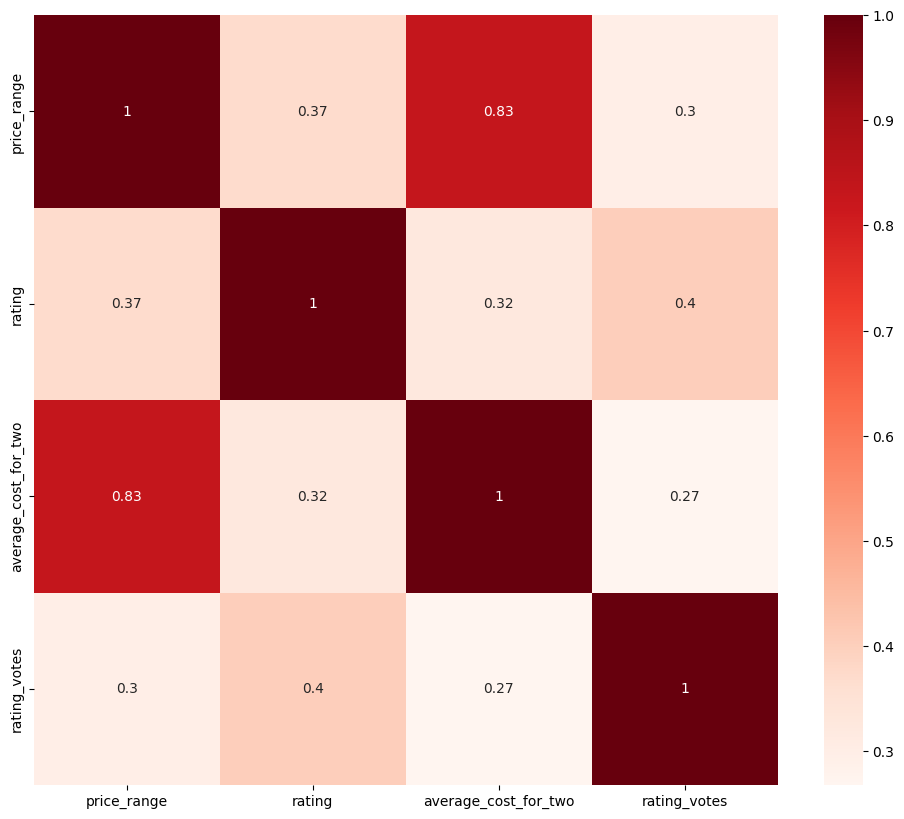

In [86]:
plt.figure(figsize=(12,10))
cor = df_minmax_scaled.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

#model training for zero rating votes
tes

In [87]:

X = df_minmax_scaled.drop('rating_votes', axis = 1)
Y = df_minmax_scaled['rating_votes']

X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y, test_size = 0.3, random_state = 43)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(5291, 3)
(2268, 3)
(5291,)
(2268,)


In [88]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

training(lm,X_train, Y_train,X_test,Y_test)

Test data metrics
MAE: 167.20350863704581
MSE: 123166.67674122065
RMSE: 350.95110306311994
R2: 0.21613804910074863
Error % : -743.2702617068381  %

Train data metrics
MAE: 177.09685207386048
MSE: 186606.95318436567
RMSE: 431.9802694387391
R2: 0.18073839037062556
Error % : -735.801302214123  %


In [89]:
df3_ratingvotes

price_range  rating  average_cost_for_two  rating_votes
0                3     4.3                  1600          7931
1                3     4.5                  1500           778
2                2     4.4                   850          1537
3                3     4.1                  1850          1823
4                3     4.4                  1600           840
...            ...     ...                   ...           ...
28121            1     2.9                   300             4
28122            2     3.3                   800             1
28124            2     3.9                   550           132
28125            3     2.1                  1400            22
28490            1     3.6                   450           111

[7559 rows x 4 columns]

In [90]:
df3_zero_ratingvotes['rating_votes'] = df3_zero_ratingvotes.pop('rating_votes') #moving selling_price to last column

In [91]:
df3_zero_ratingvotes

price_range  rating  average_cost_for_two  rating_votes
2020             1     3.2                   400             0
2075             1     3.2                   250             0
2172             1     3.2                   200             0
2173             1     3.2                   300             0
2174             2     3.3                   750             0
...            ...     ...                   ...           ...
28103            2     3.3                   500             0
28107            2     3.3                   500             0
28120            1     3.2                   150             0
28487            1     3.2                   200             0
28488            1     3.2                   100             0

[1093 rows x 4 columns]

In [92]:
X_target_ratingvotes = df3_zero_ratingvotes.drop('rating_votes', axis = 1)

In [93]:
df_ratingvotes_inp_scaled = X_target_ratingvotes
df_ratingvotes_inp_scaled[df_for_scalar.columns] = scaler.transform(df_ratingvotes_inp_scaled[df_for_scalar.columns])

In [94]:
df_ratingvotes_inp_scaled

price_range    rating  average_cost_for_two
2020      0.000000  0.451613               0.05000
2075      0.000000  0.451613               0.03125
2172      0.000000  0.451613               0.02500
2173      0.000000  0.451613               0.03750
2174      0.333333  0.483871               0.09375
...            ...       ...                   ...
28103     0.333333  0.483871               0.06250
28107     0.333333  0.483871               0.06250
28120     0.000000  0.451613               0.01875
28487     0.000000  0.451613               0.02500
28488     0.000000  0.451613               0.01250

[1093 rows x 3 columns]

In [95]:
lm.predict(df_ratingvotes_inp_scaled)

array([48.75914831, 42.5161338 , 40.43512896, ..., 38.35412412,
       40.43512896, 36.27311929])

In [96]:
df3_zero_ratingvotes['rating_votes'] = lm.predict(df_ratingvotes_inp_scaled)

In [97]:
df3_zero_ratingvotes

price_range  rating  average_cost_for_two  rating_votes
2020             1     3.2                   400     48.759148
2075             1     3.2                   250     42.516134
2172             1     3.2                   200     40.435129
2173             1     3.2                   300     44.597139
2174             2     3.3                   750    165.115755
...            ...     ...                   ...           ...
28103            2     3.3                   500    154.710730
28107            2     3.3                   500    154.710730
28120            1     3.2                   150     38.354124
28487            1     3.2                   200     40.435129
28488            1     3.2                   100     36.273119

[1093 rows x 4 columns]

In [98]:
df3_zero_ratingvotes['rating_votes'].describe()

count    1093.000000
mean       67.171030
std        57.864049
min        34.192114
25%        40.435129
50%        44.597139
75%        48.759148
max       529.010550
Name: rating_votes, dtype: float64

In [99]:
df3_zero_ratingvotes['rating_votes'] = df3_zero_ratingvotes['rating_votes'].apply(lambda x: round(x))

In [100]:
for i in df3_zero_ratingvotes.index:
  df3['rating_votes'].loc[i] =  df3_zero_ratingvotes['rating_votes'].loc[i]

C:\Users\ashfaq.ahamed\AppData\Local\Temp\ipykernel_12560\545122530.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df3['rating_votes'].loc[i] =  df3_zero_ratingvotes['rating_votes'].loc[i]
C:\Users\ashfaq.ahamed\AppData\Local\Temp\ipyke

In [101]:
df3['rating'] = df3['rating'].apply(lambda x: round(x,1))

In [102]:
df3.query('rating_votes == 0')

Empty DataFrame
Columns: [price_range, name, cuisines, city, rating, rating_votes, currency, average_cost_for_two]
Index: []

#EDA


In [103]:
df3.query('average_cost_for_two > 7000')

price_range                               name  cuisines       city  \
1469            4  Orient Express - Taj Palace Hotel  European  New Delhi   

      rating  rating_votes currency  average_cost_for_two  
1469     4.0           145      Rs.                  8000

In [104]:
df3.query(" rating_votes > 3000")

price_range                                  name  \
0                3                      Hauz Khas Social   
11               4                            Farzi Cafe   
14               3                   My Bar Headquarters   
18               2                       Saravana Bhavan   
23               3                             Peter Cat   
24               3                       Barbeque Nation   
35               2                                 BarBQ   
36               3                               Mocambo   
45               3                       Mirchi And Mime   
49               3                             SpiceKlub   
55               2                          Joey's Pizza   
61               4                                  Toit   
62               2                              Truffles   
64               3                           Big Brewsky   
69               2                      Glen's Bakehouse   
71               3             AB's - Absolute Barbecues   
79               3                       The Black Pearl   
107              3             AB's - Absolute Barbecues   
111              3                               Exotica   
131              4                       Barbeque Nation   
1343             2                               Cha Bar   
1345             2                                 Ricos   
1352             3  Downtown - Diners & Living Beer Cafe   
1354             2                               Karim's   
1356             3                                Gulati   
2021             3                The All American Diner   
2023             3                             Big Chill   
2695             2                     Rajinder Da Dhaba   
3206             3                        The Vault Cafe   
3227             3                       Barbeque Nation   
3291             1                              Wenger's   
3451             1                         Andhra Bhavan   
10918            3                The Flying Saucer Cafe   
11944            2                       Big Yellow Door   
11954            3                        Warehouse Cafe   
12340            3                        Out Of The Box   
15946            2                       Big Yellow Door   

                                                cuisines       city  rating  \
0             Continental, American, Asian, North Indian  New Delhi     4.3   
11                                         Modern Indian    Gurgaon     4.3   
14                        North Indian, Mughlai, Chinese  New Delhi     3.7   
18                                          South Indian  New Delhi     4.3   
23                             Continental, North Indian    Kolkata     4.3   
24                                 North Indian, Chinese    Kolkata     4.9   
35                                 Chinese, North Indian    Kolkata     4.2   
36                    Continental, Italian, North Indian    Kolkata     3.5   
45                   North Indian, South Indian, Mughlai     Mumbai     4.9   
49                                          North Indian     Mumbai     4.2   
55                                                 Pizza     Mumbai     4.0   
61                              Italian, American, Pizza  Bangalore     4.8   
62                                American, Burger, Cafe  Bangalore     4.7   
64     Finger Food, North Indian, Italian, Continenta...  Bangalore     4.5   
69                                Bakery, Desserts, Cafe  Bangalore     4.0   
71                 European, Mediterranean, North Indian  Bangalore     4.6   
79                 North Indian, European, Mediterranean  Bangalore     4.1   
107                European, Mediterranean, North Indian  Hyderabad     4.9   
111                       Mughlai, North Indian, Chinese  Hyderabad     4.3   
131                            North Indian, Continental    Chennai     4.4   
1343                                                Cafe  New Delhi

In [105]:
df3.shape

(8652, 8)

In [106]:
df3.query('rating >= 0 and rating <= 1')['price_range'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: price_range, dtype: float64

<Axes: xlabel='price_range', ylabel='average_cost_for_two'>

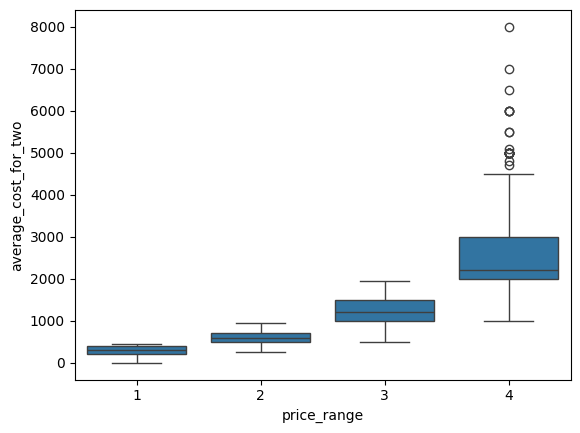

In [107]:
sns.boxplot(x = 'price_range', y ='average_cost_for_two', data=df3)

In [108]:
df3['price_range'] = df3.apply(lambda row: 5 if row['average_cost_for_two'] > 3000 and row['currency'] =='Rs.' else row['price_range'], axis=1)

<Axes: xlabel='price_range', ylabel='average_cost_for_two'>

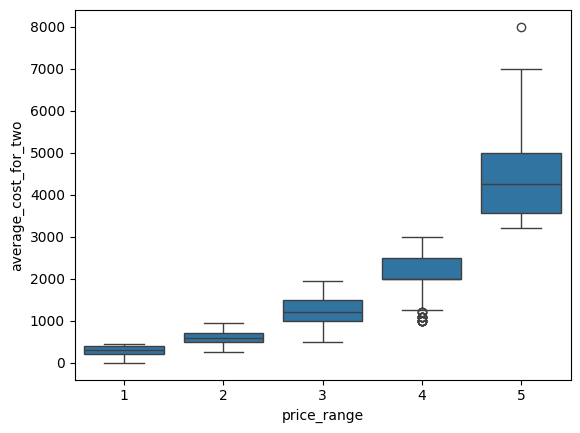

In [109]:
sns.boxplot(x = 'price_range', y ='average_cost_for_two', data=df3)

In [110]:
for i in range(1,6):

  newdf = df3.mask(df3["price_range"] == i)
  print(f'Mean of rating with respect to {i} price range : ', newdf['rating'].mean())

print('\n')

for i in range(1,6):

  newdf = df3.mask(df3["price_range"] == i)
  print(f'Mean of rating_votes with respect to {i} price range', newdf['rating_votes'].mean())

print('\n')

for i in range(1,6):

  newdf = df3.mask(df3["price_range"] == i)
  print(f'Mean of average_cost_for_two with respect to {i} price range', newdf['average_cost_for_two'].mean())

Mean of rating with respect to 1 price range :  3.4417259582281385
Mean of rating with respect to 2 price range :  3.3248360372799444
Mean of rating with respect to 3 price range :  3.268770720063652
Mean of rating with respect to 4 price range :  3.3059112709832137
Mean of rating with respect to 5 price range :  3.316511194029851


Mean of rating_votes with respect to 1 price range 244.74523754877208
Mean of rating_votes with respect to 2 price range 146.89748015188127
Mean of rating_votes with respect to 3 price range 101.16589311762365
Mean of rating_votes with respect to 4 price range 134.7630695443645
Mean of rating_votes with respect to 5 price range 144.3984375


Mean of average_cost_for_two with respect to 1 price range 957.5327059903603
Mean of average_cost_for_two with respect to 2 price range 624.970659302727
Mean of average_cost_for_two with respect to 3 price range 529.8899350218804
Mean of average_cost_for_two with respect to 4 price range 566.378896882494
Mean of average

<Axes: xlabel='price_range', ylabel='rating'>

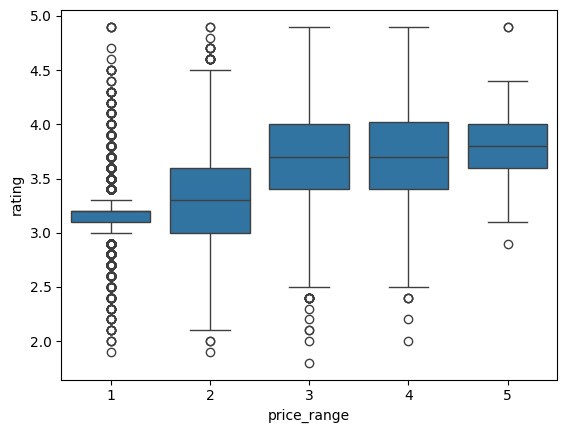

In [111]:
sns.boxplot(x = 'price_range', y ='rating', data=df3)

<Axes: xlabel='price_range', ylabel='rating_votes'>

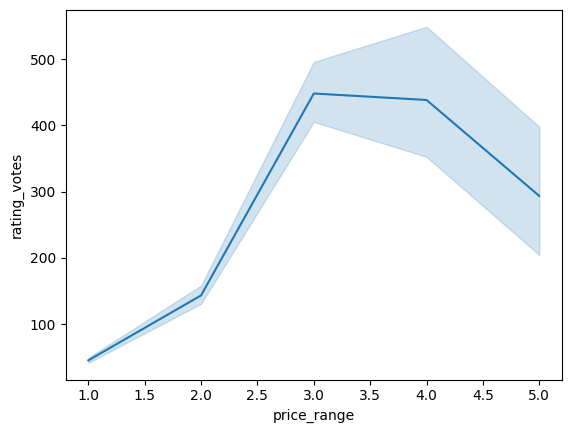

In [112]:
sns.lineplot(x = 'price_range', y ='rating_votes', data=df3)

<Axes: xlabel='rating', ylabel='rating_votes'>

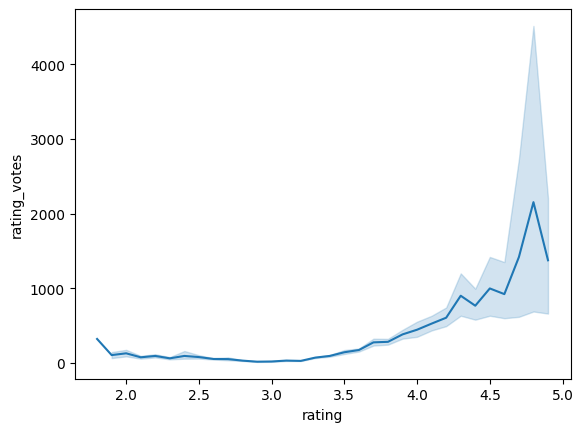

In [113]:
sns.lineplot(x = 'rating', y ='rating_votes', data=df3)

<Axes: xlabel='rating_votes', ylabel='average_cost_for_two'>

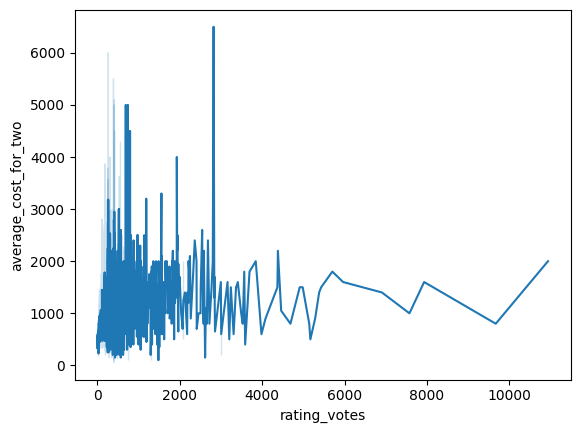

In [114]:
sns.lineplot(x = 'rating_votes', y ='average_cost_for_two', data=df3)

<Axes: xlabel='rating', ylabel='average_cost_for_two'>

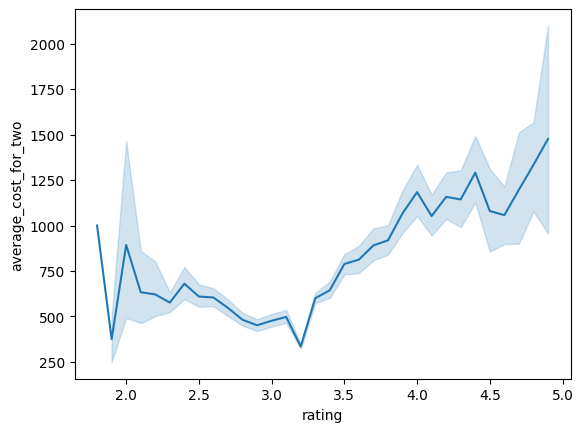

In [115]:
sns.lineplot(x = 'rating', y ='average_cost_for_two', data=df3)

##Cuisine feature analysis

In [116]:
df3['cuisines']

0               Continental, American, Asian, North Indian
1        Thai, European, Mexican, North Indian, Chinese...
2                      Cafe, Italian, Continental, Chinese
3                                     Italian, Continental
4                   North Indian, Italian, Asian, American
                               ...                        
28124    Continental, Mexican, American, Fast Food, Ita...
28125                       North Indian, Mughlai, Chinese
28487                                              Mughlai
28488                                  Mithai, Street Food
28490                        Continental, Mexican, Italian
Name: cuisines, Length: 8652, dtype: object

In [117]:
cuisine_list = []

for i in df3['cuisines']:
    cuisine_list.extend(i.split(', '))
    print(i)

cuisine_list = list(dict.fromkeys(cuisine_list))
print(cuisine_list)

cuisine_dict = {index: value for index, value in enumerate(cuisine_list)}

Continental, American, Asian, North Indian
Thai, European, Mexican, North Indian, Chinese, Cafe
Cafe, Italian, Continental, Chinese
Italian, Continental
North Indian, Italian, Asian, American
Cafe, Continental, Chinese, Italian
Finger Food, American, Continental, North Indian, Italian
Italian, European
Modern Indian
North Indian, Mughlai
Continental, Mexican
Modern Indian
Continental, North Indian, Italian, Chinese
North Indian, Mediterranean, Asian, Fast Food
North Indian, Mughlai, Chinese
North Indian, Mexican, Italian, Continental
Finger Food, North Indian, Continental, Italian
North Indian, Chinese, Continental
South Indian
Continental, American, Asian, North Indian
Continental, Middle Eastern, Asian
Italian, Mexican, American, Mediterranean
North Indian, Chinese
Continental, North Indian
North Indian, Chinese
Cafe, Chinese, Continental
Bengali
Tex-Mex, American
European, American
Asian, Chinese
Biryani, North Indian, Chinese, Mughlai
Chinese, Cafe, North Indian, Desserts
Seafood, 

In [118]:
cuisine_dict

{0: 'Continental',
 1: 'American',
 2: 'Asian',
 3: 'North Indian',
 4: 'Thai',
 5: 'European',
 6: 'Mexican',
 7: 'Chinese',
 8: 'Cafe',
 9: 'Italian',
 10: 'Finger Food',
 11: 'Modern Indian',
 12: 'Mughlai',
 13: 'Mediterranean',
 14: 'Fast Food',
 15: 'South Indian',
 16: 'Middle Eastern',
 17: 'Bengali',
 18: 'Tex-Mex',
 19: 'Biryani',
 20: 'Desserts',
 21: 'Seafood',
 22: 'Street Food',
 23: 'Tea',
 24: 'Bakery',
 25: 'Burger',
 26: 'Pizza',
 27: 'Healthy Food',
 28: 'Salad',
 29: 'Beverages',
 30: 'Japanese',
 31: 'British',
 32: 'Spanish',
 33: 'Greek',
 34: 'Charcoal Grill',
 35: 'Indonesian',
 36: 'North Eastern',
 37: 'Burmese',
 38: 'German',
 39: 'Andhra',
 40: 'Chettinad',
 41: 'Goan',
 42: 'Hyderabadi',
 43: 'Awadhi',
 44: 'Arabian',
 45: 'Lebanese',
 46: 'Lucknowi',
 47: 'Ice Cream',
 48: 'Kerala',
 49: 'Rajasthani',
 50: 'Armenian',
 51: 'Sandwich',
 52: 'Malaysian',
 53: 'French',
 54: 'Maharashtrian',
 55: 'Malwani',
 56: 'Portuguese',
 57: 'African',
 58: 'Juices',


In [119]:
cuisine_dict.values()

dict_values(['Continental', 'American', 'Asian', 'North Indian', 'Thai', 'European', 'Mexican', 'Chinese', 'Cafe', 'Italian', 'Finger Food', 'Modern Indian', 'Mughlai', 'Mediterranean', 'Fast Food', 'South Indian', 'Middle Eastern', 'Bengali', 'Tex-Mex', 'Biryani', 'Desserts', 'Seafood', 'Street Food', 'Tea', 'Bakery', 'Burger', 'Pizza', 'Healthy Food', 'Salad', 'Beverages', 'Japanese', 'British', 'Spanish', 'Greek', 'Charcoal Grill', 'Indonesian', 'North Eastern', 'Burmese', 'German', 'Andhra', 'Chettinad', 'Goan', 'Hyderabadi', 'Awadhi', 'Arabian', 'Lebanese', 'Lucknowi', 'Ice Cream', 'Kerala', 'Rajasthani', 'Armenian', 'Sandwich', 'Malaysian', 'French', 'Maharashtrian', 'Malwani', 'Portuguese', 'African', 'Juices', 'Tibetan', 'Mithai', 'Indian', 'BBQ', 'Cajun', 'Vietnamese', 'Steak', 'Parsi', 'Mangalorean', 'Gujarati', 'Korean', 'Bihari', 'Naga', 'Assamese', 'Sushi', 'Drinks Only', 'Raw Meats', 'Kashmiri', 'Turkish', 'Moroccan', 'Nepalese', 'Deli', 'Afghani', 'Iranian', 'Cuisine Var

In [120]:
def searchkey(value):
    for key, val in cuisine_dict.items():
        if value == val:
            return key

def cuisine_name2num(i):

    #for i in df['cuisines']:
    sorted_i = sorted(i)
    n1 = ''
    kval = 0
    for ij in sorted_i:
        kval = searchkey(ij)
        if kval is not None:
            n1 += str(kval)
    return n1


In [121]:
cuisine_name2num(['Continental', 'American', 'Asian'])

'120'

In [122]:
searchkey('American')

1

In [123]:
df2['cuisines']

0               Continental, American, Asian, North Indian
1        Thai, European, Mexican, North Indian, Chinese...
2                      Cafe, Italian, Continental, Chinese
3                                     Italian, Continental
4                   North Indian, Italian, Asian, American
                               ...                        
29746                                    Burger, Fast Food
29747                              Burger, Pizza, Sandwich
29749                             American, Seafood, Steak
29750                                 American, BBQ, Steak
29751                                          Asian, Thai
Name: cuisines, Length: 9553, dtype: object

In [124]:
df3['cuisines'] = df['cuisines'].apply(lambda x: x.split(', ')) #df3 df cuisine list converted
df3

price_range                        name  \
0                3            Hauz Khas Social   
1                3  Qubitos - The Terrace Cafe   
2                2             The Hudson Cafe   
3                3           Summer House Cafe   
4                3                 38 Barracks   
...            ...                         ...   
28124            2             Sam and Scrooge   
28125            3                  Chawla's 2   
28487            1                     Ahmed's   
28488            1      Mittal Bikaneri Sweets   
28490            1                     Burnout   

                                                cuisines       city  rating  \
0           [Continental, American, Asian, North Indian]  New Delhi     4.3   
1      [Thai, European, Mexican, North Indian, Chines...  New Delhi     4.5   
2                  [Cafe, Italian, Continental, Chinese]  New Delhi     4.4   
3                                 [Italian, Continental]  New Delhi     4.1   
4               [North Indian, Italian, Asian, American]  New Delhi     4.4   
...                                                  ...        ...     ...   
28124  [Continental, Mexican, American, Fast Food, It...      Noida     3.9   
28125                   [North Indian, Mughlai, Chinese]      Noida     2.1   
28487                                          [Mughlai]      Noida     3.2   
28488                              [Mithai, Street Food]      Noida     3.2   
28490                    [Continental, Mexican, Italian]      Noida     3.6   

       rating_votes currency  average_cost_for_two  
0              7931      Rs.                  1600  
1               778      Rs.                  1500  
2              1537      Rs.                   850  
3              1823      Rs.                  1850  
4               840      Rs.                  1600  
...             ...      ...                   ...  
28124           132      Rs.                   550  
28125            22      Rs.                  1400  
28487            40      Rs.                   200  
28488            36      Rs.                   100  
28490           111      Rs.                   450  

[8652 rows x 8 columns]

In [125]:
def cuisinecount(i):
  return len(i)

In [126]:
df3.insert(3,'cuisine_count','')

In [127]:
df3['cuisine_count'] = df3['cuisines'].apply(cuisinecount)

In [128]:
df3

price_range                        name  \
0                3            Hauz Khas Social   
1                3  Qubitos - The Terrace Cafe   
2                2             The Hudson Cafe   
3                3           Summer House Cafe   
4                3                 38 Barracks   
...            ...                         ...   
28124            2             Sam and Scrooge   
28125            3                  Chawla's 2   
28487            1                     Ahmed's   
28488            1      Mittal Bikaneri Sweets   
28490            1                     Burnout   

                                                cuisines  cuisine_count  \
0           [Continental, American, Asian, North Indian]              4   
1      [Thai, European, Mexican, North Indian, Chines...              6   
2                  [Cafe, Italian, Continental, Chinese]              4   
3                                 [Italian, Continental]              2   
4               [North Indian, Italian, Asian, American]              4   
...                                                  ...            ...   
28124  [Continental, Mexican, American, Fast Food, It...              6   
28125                   [North Indian, Mughlai, Chinese]              3   
28487                                          [Mughlai]              1   
28488                              [Mithai, Street Food]              2   
28490                    [Continental, Mexican, Italian]              3   

            city  rating  rating_votes currency  average_cost_for_two  
0      New Delhi     4.3          7931      Rs.                  1600  
1      New Delhi     4.5           778      Rs.                  1500  
2      New Delhi     4.4          1537      Rs.                   850  
3      New Delhi     4.1          1823      Rs.                  1850  
4      New Delhi     4.4           840      Rs.                  1600  
...          ...     ...           ...      ...                   ...  
28124      Noida     3.9           132      Rs.                   550  
28125      Noida     2.1            22      Rs.                  1400  
28487      Noida     3.2            40      Rs.                   200  
28488      Noida     3.2            36      Rs.                   100  
28490      Noida     3.6           111      Rs.                   450  

[8652 rows x 9 columns]

In [129]:
def sortCuisine(l):
  return str(sorted(l))

In [130]:
df5 = df3.copy()
df5['sorted_cuisine'] = df5['cuisines'].apply(sortCuisine)

In [131]:
df5

price_range                        name  \
0                3            Hauz Khas Social   
1                3  Qubitos - The Terrace Cafe   
2                2             The Hudson Cafe   
3                3           Summer House Cafe   
4                3                 38 Barracks   
...            ...                         ...   
28124            2             Sam and Scrooge   
28125            3                  Chawla's 2   
28487            1                     Ahmed's   
28488            1      Mittal Bikaneri Sweets   
28490            1                     Burnout   

                                                cuisines  cuisine_count  \
0           [Continental, American, Asian, North Indian]              4   
1      [Thai, European, Mexican, North Indian, Chines...              6   
2                  [Cafe, Italian, Continental, Chinese]              4   
3                                 [Italian, Continental]              2   
4               [North Indian, Italian, Asian, American]              4   
...                                                  ...            ...   
28124  [Continental, Mexican, American, Fast Food, It...              6   
28125                   [North Indian, Mughlai, Chinese]              3   
28487                                          [Mughlai]              1   
28488                              [Mithai, Street Food]              2   
28490                    [Continental, Mexican, Italian]              3   

            city  rating  rating_votes currency  average_cost_for_two  \
0      New Delhi     4.3          7931      Rs.                  1600   
1      New Delhi     4.5           778      Rs.                  1500   
2      New Delhi     4.4          1537      Rs.                   850   
3      New Delhi     4.1          1823      Rs.                  1850   
4      New Delhi     4.4           840      Rs.                  1600   
...          ...     ...           ...      ...                   ...   
28124      Noida     3.9           132      Rs.                   550   
28125      Noida     2.1            22      Rs.                  1400   
28487      Noida     3.2            40      Rs.                   200   
28488      Noida     3.2            36      Rs.                   100   
28490      Noida     3.6           111      Rs.                   450   

                                          sorted_cuisine  
0      ['American', 'Asian', 'Continental', 'North In...  
1      ['Cafe', 'Chinese', 'European', 'Mexican', 'No...  
2          ['Cafe', 'Chinese', 'Continental', 'Italian']  
3                             ['Continental', 'Italian']  
4       ['American', 'Asian', 'Italian', 'North Indian']  
...                                                  ...  
28124  ['American', 'Chinese', 'Continental', 'Fast F...  
28125             ['Chinese', 'Mughlai', 'North Indian']  
28487                                        ['Mughlai']  
28488                          ['Mithai', 'Street Food']  
28490              ['Continental', 'Italian', 'Mexican']  

[8652 rows x 10 columns]

In [132]:
df6 = df5.copy()
df6['numbered_cuisine'] = df6['cuisines'].apply(cuisine_name2num)
#df3 - cuisine name to num converted

In [133]:
df6

price_range                        name  \
0                3            Hauz Khas Social   
1                3  Qubitos - The Terrace Cafe   
2                2             The Hudson Cafe   
3                3           Summer House Cafe   
4                3                 38 Barracks   
...            ...                         ...   
28124            2             Sam and Scrooge   
28125            3                  Chawla's 2   
28487            1                     Ahmed's   
28488            1      Mittal Bikaneri Sweets   
28490            1                     Burnout   

                                                cuisines  cuisine_count  \
0           [Continental, American, Asian, North Indian]              4   
1      [Thai, European, Mexican, North Indian, Chines...              6   
2                  [Cafe, Italian, Continental, Chinese]              4   
3                                 [Italian, Continental]              2   
4               [North Indian, Italian, Asian, American]              4   
...                                                  ...            ...   
28124  [Continental, Mexican, American, Fast Food, It...              6   
28125                   [North Indian, Mughlai, Chinese]              3   
28487                                          [Mughlai]              1   
28488                              [Mithai, Street Food]              2   
28490                    [Continental, Mexican, Italian]              3   

            city  rating  rating_votes currency  average_cost_for_two  \
0      New Delhi     4.3          7931      Rs.                  1600   
1      New Delhi     4.5           778      Rs.                  1500   
2      New Delhi     4.4          1537      Rs.                   850   
3      New Delhi     4.1          1823      Rs.                  1850   
4      New Delhi     4.4           840      Rs.                  1600   
...          ...     ...           ...      ...                   ...   
28124      Noida     3.9           132      Rs.                   550   
28125      Noida     2.1            22      Rs.                  1400   
28487      Noida     3.2            40      Rs.                   200   
28488      Noida     3.2            36      Rs.                   100   
28490      Noida     3.6           111      Rs.                   450   

                                          sorted_cuisine numbered_cuisine  
0      ['American', 'Asian', 'Continental', 'North In...             1203  
1      ['Cafe', 'Chinese', 'European', 'Mexican', 'No...           875634  
2          ['Cafe', 'Chinese', 'Continental', 'Italian']             8709  
3                             ['Continental', 'Italian']               09  
4       ['American', 'Asian', 'Italian', 'North Indian']             1293  
...                                                  ...              ...  
28124  ['American', 'Chinese', 'Continental', 'Fast F...          1701496  
28125             ['Chinese', 'Mughlai', 'North Indian']             7123  
28487                                        ['Mughlai']               12  
28488                          ['Mithai', 'Street Food']             6022  
28490              ['Continental', 'Italian', 'Mexican']              096  

[8652 rows x 11 columns]

In [134]:
df6['sorted_cuisine'].nunique()

940

##Data Exploration

In [135]:
df7 = df6.copy()

In [136]:
df7.query('price_range == 3')

price_range                        name  \
0                3            Hauz Khas Social   
1                3  Qubitos - The Terrace Cafe   
3                3           Summer House Cafe   
4                3                 38 Barracks   
9                3           Indian Grill Room   
...            ...                         ...   
27436            3                 Thaal Vaadi   
27442            3                   Pizza Hut   
27593            3            The Hangout-Deli   
27594            3                   Pizza Hut   
28125            3                  Chawla's 2   

                                                cuisines  cuisine_count  \
0           [Continental, American, Asian, North Indian]              4   
1      [Thai, European, Mexican, North Indian, Chines...              6   
3                                 [Italian, Continental]              2   
4               [North Indian, Italian, Asian, American]              4   
9                                [North Indian, Mughlai]              2   
...                                                  ...            ...   
27436                         [North Indian, Rajasthani]              2   
27442                        [Italian, Pizza, Fast Food]              3   
27593                   [Continental, Lebanese, Mexican]              3   
27594                        [Italian, Pizza, Fast Food]              3   
28125                   [North Indian, Mughlai, Chinese]              3   

            city  rating  rating_votes currency  average_cost_for_two  \
0      New Delhi     4.3          7931      Rs.                  1600   
1      New Delhi     4.5           778      Rs.                  1500   
3      New Delhi     4.1          1823      Rs.                  1850   
4      New Delhi     4.4           840      Rs.                  1600   
9        Gurgaon     4.5          1262      Rs.                  1800   
...          ...     ...           ...      ...                   ...   
27436      Noida     3.5           249      Rs.                  1000   
27442      Noida     3.7           189      Rs.                  1000   
27593      Noida     3.5           311      Rs.                  1000   
27594      Noida     3.5           311      Rs.                  1000   
28125      Noida     2.1            22      Rs.                  1400   

                                          sorted_cuisine numbered_cuisine  
0      ['American', 'Asian', 'Continental', 'North In...             1203  
1      ['Cafe', 'Chinese', 'European', 'Mexican', 'No...           875634  
3                             ['Continental', 'Italian']               09  
4       ['American', 'Asian', 'Italian', 'North Indian']             1293  
9                            ['Mughlai', 'North Indian']              123  
...                                                  ...              ...  
27436                     ['North Indian', 'Rajasthani']              349  
27442                  ['Fast Food', 'Italian', 'Pizza']            14926  
27593             ['Continental', 'Lebanese', 'Mexican']             0456  
27594                  ['Fast Food', 'Italian', 'Pizza']            14926  
28125             ['Chinese', 'Mughlai', 'North Indian']             7123  

[1111 rows x 11 columns]

In [137]:
df7.sort_values(by="average_cost_for_two", ascending=False)

price_range                                      name  \
1469             5         Orient Express - Taj Palace Hotel   
1462             5  Tian - Asian Cuisine Studio - ITC Maurya   
20639            5                      Bukhara - ITC Maurya   
13697            5  Wasabi by Morimoto - The Taj Mahal Hotel   
3276             5                       1911 - The Imperial   
...            ...                                       ...   
366              1                                UrbanCrave   
371              1             Atmosphere Grill Cafe Sheesha   
681              1                           VNS Live Studio   
683              1                        Deena Chat Bhandar   
581              1                           Sheroes Hangout   

                                                cuisines  cuisine_count  \
1469                                          [European]              1   
1462            [Asian, Japanese, Korean, Thai, Chinese]              5   
20639                                     [North Indian]              1   
13697                                  [Japanese, Sushi]              2   
3276      [North Indian, Chinese, South Indian, Italian]              4   
...                                                  ...            ...   
366    [Cafe, Continental, Desserts, Ice Cream, Itali...              6   
371                       [Indian, Chinese, Continental]              3   
681                              [Chinese, North Indian]              2   
683                                        [Street Food]              1   
581                        [Cafe, North Indian, Chinese]              3   

            city  rating  rating_votes currency  average_cost_for_two  \
1469   New Delhi     4.0           145      Rs.                  8000   
1462   New Delhi     4.1           188      Rs.                  7000   
20639  New Delhi     4.4          2826      Rs.                  6500   
13697  New Delhi     3.9           183      Rs.                  6000   
3276   New Delhi     3.9           272      Rs.                  6000   
...          ...     ...           ...      ...                   ...   
366       Kanpur     3.9           127      Rs.                     0   
371       Kanpur     3.6            34      Rs.                     0   
681     Varanasi     3.5           109      Rs.                     0   
683     Varanasi     3.8            78      Rs.                     0   
581         Agra     4.9            77      Rs.                     0   

                                          sorted_cuisine numbered_cuisine  
1469                                        ['European']                5  
1462   ['Asian', 'Chinese', 'Japanese', 'Korean', 'Th...          2730694  
20639                                   ['North Indian']                3  
13697                              ['Japanese', 'Sushi']             3073  
3276   ['Chinese', 'Italian', 'North Indian', 'South ...            79315  
...                                                  ...              ...  
366    ['Beverages', 'Cafe', 'Continental', 'Desserts...        298020479  
371                 ['Chinese', 'Continental', 'Indian']             7061  
681                          ['Chinese', 'North Indian']               73  
683                                      ['Street Food']               22  
581                  ['Cafe', 'Chinese', 'North Indian']              873  

[8652 rows x 11 columns]

In [138]:
df7.query("average_cost_for_two > 4000").head(30)

price_range                                      name  \
1359             5                            Masala Library   
1460             5              Le Cirque - The Leela Palace   
1462             5  Tian - Asian Cuisine Studio - ITC Maurya   
1464             5                   MEGU - The Leela Palace   
1469             5         Orient Express - Taj Palace Hotel   
1673             5            Club BW - The Suryaa New Delhi   
1811             5          Oval Bar - JW Marriott New Delhi   
2302             5             Empress of China - Eros Hotel   
2304             5                                      Hype   
2696             5                 La Piazza - Hyatt Regency   
2697             5             China Kitchen - Hyatt Regency   
3150             5                Varq - The Taj Mahal Hotel   
3162             5       House of Ming - The Taj Mahal Hotel   
3267             5     24/7 Restaurant - The Lalit New Delhi   
3274             5                     The One - Le Meridien   
3276             5                       1911 - The Imperial   
3280             5              Eau De Monsoon - Le Meridien   
3283             5             Baluchi - The Lalit New Delhi   
3284             5            The Spice Route - The Imperial   
3368             5                Le Belvedere - Le Meridien   
3371             5      Sorrento - Shangri-La's - Eros Hotel   
3374             5              San Gimignano - The Imperial   
3380             5    Shang Palace - Shangri-La's Eros Hotel   
3465             5            Kitty Su - The Lalit New Delhi   
3479             5                     Dhaba - The Claridges   
3549             5              Machan - The Taj Mahal Hotel   
7066             5             I-Kandy - Le Meridien Gurgaon   
12526            5                   Sevilla - The Claridges   
13697            5  Wasabi by Morimoto - The Taj Mahal Hotel   
13707            5           Ricks Bar - The Taj Mahal Hotel   

                                                cuisines  cuisine_count  \
1359                                     [Modern Indian]              1   
1460                                   [French, Italian]              2   
1462            [Asian, Japanese, Korean, Thai, Chinese]              5   
1464                                   [Japanese, Sushi]              2   
1469                                          [European]              1   
1673        [Finger Food, Continental, Italian, Chinese]              4   
1811                                       [Finger Food]              1   
2302                                           [Chinese]              1   
2304              [Finger Food, Italian, Middle Eastern]              3   
2696                                           [Italian]              1   
2697                                           [Chinese]              1   
3150                             [Seafood, North Indian]              2   
3162                                           [Chinese]              1   
3267         [Continental, North Indian, Italian, Asian]              4   
3274                                       [Continental]              1   
3276      [North Indian, Chinese, South Indian, Italian]              4   
3280       [Continental, European, North Indian, French]              4   
3283               [Mughlai, North Indian, South Indian]              3   
3284   [Malaysian, Thai, Kerala, Vietnamese, Sri Lankan]              5   
3368                                           [Chinese]              1   
3371                                  [Seafood, Italian]              2   
3374                                           [Italian]              1   
3380                                           [Chinese]              1   
3465                                       [Finger Food]              1   
3479                                      [North Indian]              1   
3549               [North Indian, European, Continental]              3 

In [139]:
df7.describe().T

count        mean         std  min    25%    50%  \
price_range           8652.0    1.730467    0.880664  1.0    1.0    2.0   
cuisine_count         8652.0    2.063569    1.099754  1.0    1.0    2.0   
rating                8652.0    3.320712    0.442263  1.8    3.1    3.2   
rating_votes          8652.0  145.707813  426.390405  1.0   11.0   40.0   
average_cost_for_two  8652.0  623.370319  595.676124  0.0  300.0  450.0   

                         75%      max  
price_range             2.00      5.0  
cuisine_count           3.00      8.0  
rating                  3.60      4.9  
rating_votes          115.25  10934.0  
average_cost_for_two  700.00   8000.0

In [140]:
df7.query('name == 3001')

Empty DataFrame
Columns: [price_range, name, cuisines, cuisine_count, city, rating, rating_votes, currency, average_cost_for_two, sorted_cuisine, numbered_cuisine]
Index: []

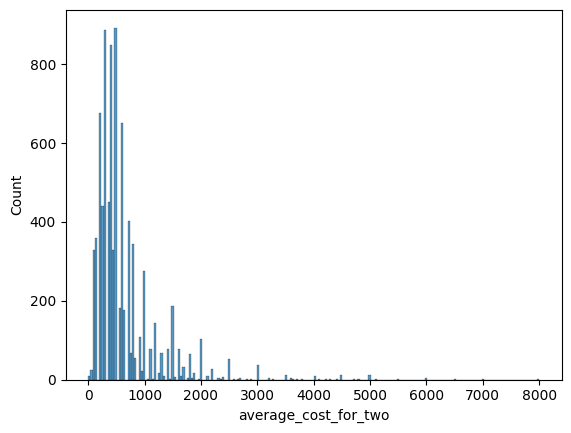

In [141]:
sns.histplot((df7['average_cost_for_two']));

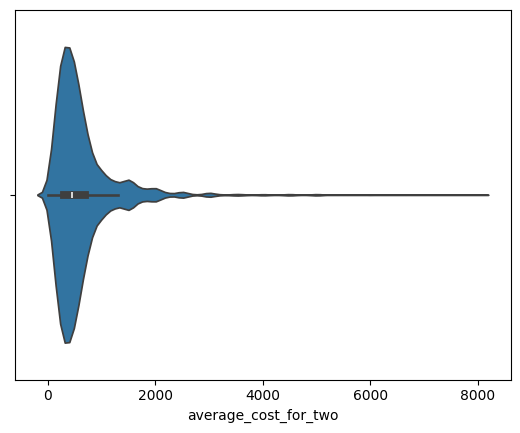

In [142]:
sns.violinplot(x='average_cost_for_two', data=df7)
plt.show()

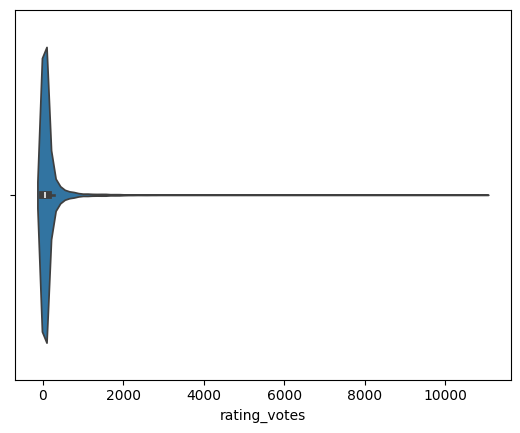

In [143]:
sns.violinplot(x='rating_votes', data=df7)
plt.show()

<Axes: xlabel='rating_votes', ylabel='average_cost_for_two'>

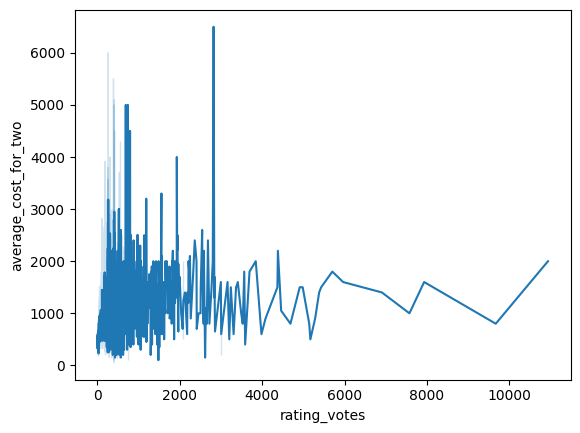

In [144]:
sns.lineplot(x='rating_votes',y='average_cost_for_two', data=df7)

<Axes: xlabel='cuisine_count', ylabel='average_cost_for_two'>

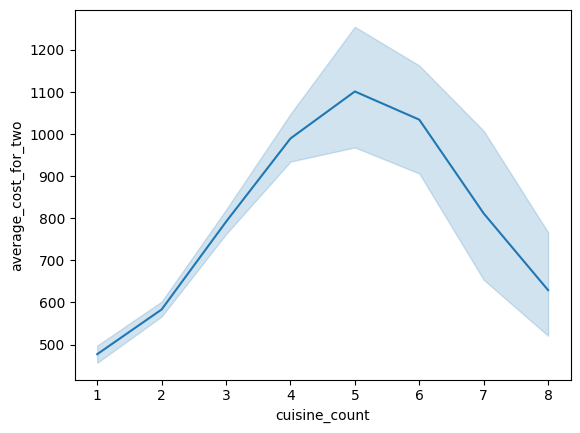

In [145]:
sns.lineplot(x='cuisine_count',y='average_cost_for_two', data=df7)

<Axes: xlabel='rating_votes'>

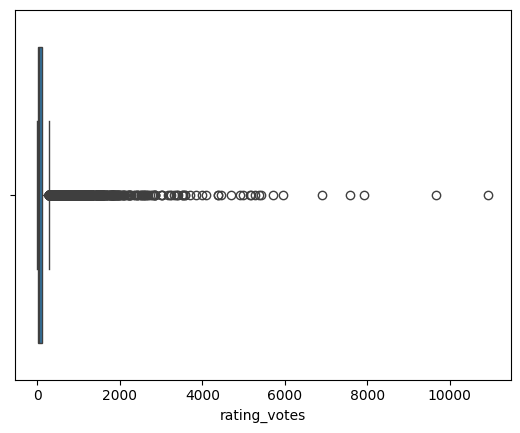

In [146]:
sns.boxplot(x='rating_votes', data=df7)

<Axes: xlabel='rating', ylabel='average_cost_for_two'>

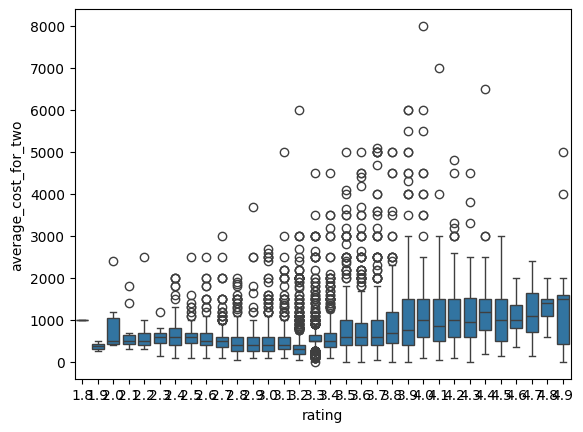

In [147]:
sns.boxplot(x='rating',y='average_cost_for_two',  data=df7)

<Axes: xlabel='price_range', ylabel='average_cost_for_two'>

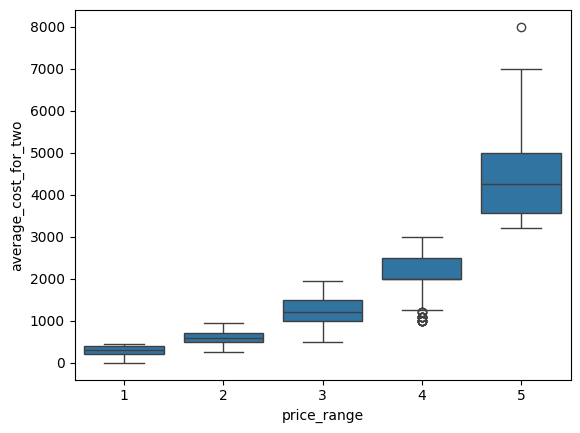

In [148]:
sns.boxplot(x='price_range',y='average_cost_for_two',  data=df7)

<Axes: xlabel='cuisine_count', ylabel='average_cost_for_two'>

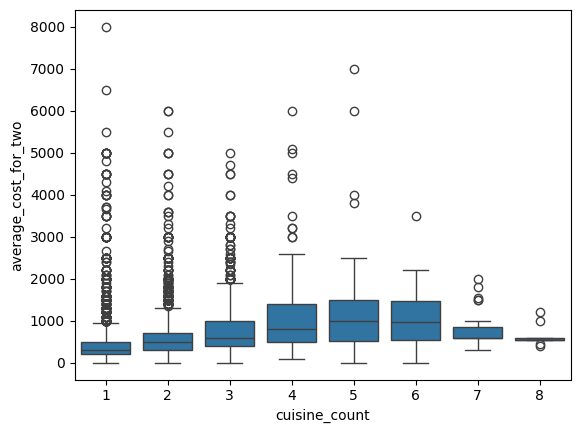

In [149]:
sns.boxplot(x='cuisine_count', y='average_cost_for_two',  data=df7)

In [150]:
df7.query('cuisine_count == 7')

price_range                            name  \
124              3              Basil With A Twist   
181              3      The Forresta Kitchen & Bar   
207              3                  Nini's Kitchen   
649              4  Bay of Buddha -  The Promenade   
1442             1                      Haldiram's   
1845             3                      CJ's Fresh   
2027             3                  Out Of The Box   
5305             2                     Bikanervala   
5438             2                      Haldiram's   
5553             2                     Bikanervala   
5671             2                      Haldiram's   
6691             2                     Bikanervala   
7062             2                      Haldiram's   
7122             2                         Nuterro   
7948             2                       InnerChef   
8145             2                      Haldiram's   
9179             2                      Haldiram's   
12185            2                  Nathu's Sweets   
13175            4                 Andrea's Eatery   
13555            2                      Haldiram's   
16585            2                      Haldiram's   
17285            2                      Haldiram's   
18268            2                      Haldiram's   
21226            2                      Haldiram's   
27200            2                  Nathu's Sweets   
27239            2                      Haldiram's   

                                                cuisines  cuisine_count  \
124    [Continental, Cafe, Spanish, Italian, European...              7   
181    [Continental, Mexican, Beverages, Desserts, No...              7   
207    [North Indian, Continental, Beverages, Italian...              7   
649    [Chinese, Thai, Malaysian, Vietnamese, Korean,...              7   
1442   [North Indian, South Indian, Chinese, Street F...              7   
1845   [American, Italian, Bakery, Deli, Burger, Sand...              7   
2027   [North Indian, Lebanese, Mexican, Asian, Itali...              7   
5305   [North Indian, South Indian, Fast Food, Street...              7   
5438   [North Indian, South Indian, Chinese, Street F...              7   
5553   [Mithai, Street Food, North Indian, South Indi...              7   
5671   [North Indian, South Indian, Chinese, Street F...              7   
6691   [North Indian, South Indian, Fast Food, Street...              7   
7062   [North Indian, South Indian, Chinese, Street F...              7   
7122   [Healthy Food, Continental, Juices, Beverages,...              7   
7948   [North Indian, South Indian, Italian, Continen...              7   
8145   [North Indian, South Indian, Chinese, Street F...              7   
9179   [North Indian, South Indian, Chinese, Street F...              7   
12185  [North Indian, South Indian, Chinese, Street F...              7   
13175  [Italian, Mexican, Spanish, Thai, Vietnamese, ...              7   
13555  [North Indian, South Indian, Chinese, Street F...              7   
16585  [North Indian, South Indian, Chinese, Street F...              7   
17285  [North Indian, South Indian, Chinese, Street F...              7   
18268  [North Indian, South Indian, Chinese, Street F...              7   
21226  [North Indian, South Indian, Chinese, Street F...              7   
27200  [North Indian, South Indian, Chinese, Street F...              7   
27239  [North Indian, South Indian, Chinese, Street F...              7   

             city  rating  rating_votes currency  average_cost_for_two  \
124       Chennai     4.5          1210      Rs.                  1500   
181        Jaipur     4.0           916      Rs.                  1800   
207     Ahmedabad     4.5          1138      Rs.                   950   
649    Puducherry     3.8           189      Rs.                  1500   
1442    New Delhi     3.6           195      Rs.                   300   
1845    New Delhi     3.8            25      Rs.                  1000   
2027

In [ ]:
#df7['cuisines'].nunique()

TypeError: unhashable type: 'list'

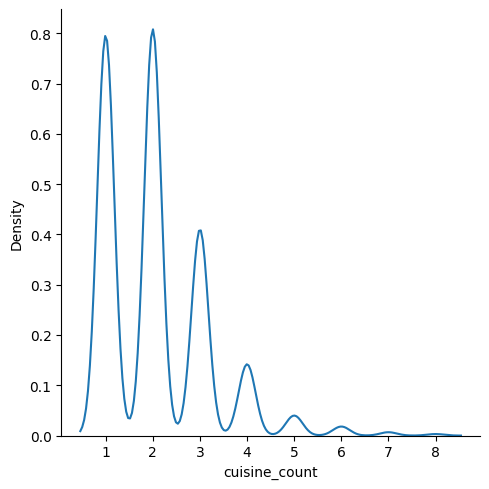

In [152]:
sns.displot(x = 'cuisine_count', kind='kde', data=df7)

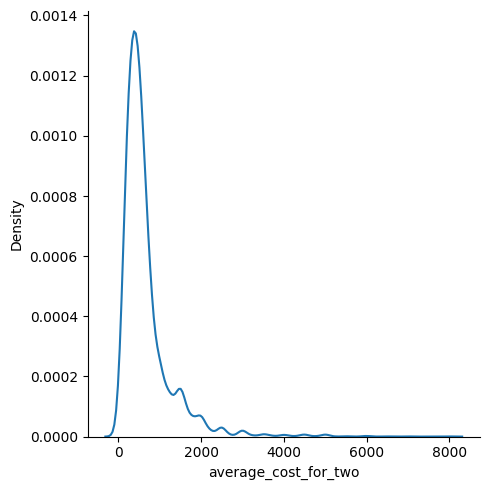

In [153]:
sns.displot(x = 'average_cost_for_two', kind='kde', data=df4)

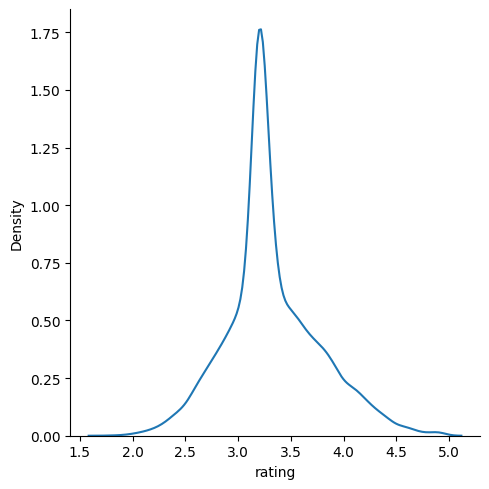

In [154]:
sns.displot(x = 'rating', kind='kde', data=df7)

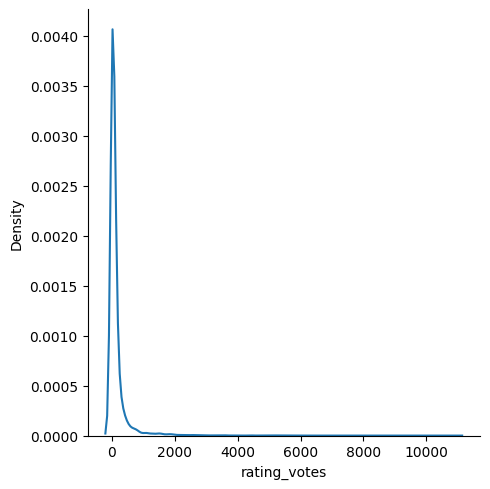

In [155]:
sns.displot(x = 'rating_votes', kind='kde', data=df7)

<Axes: xlabel='average_cost_for_two'>

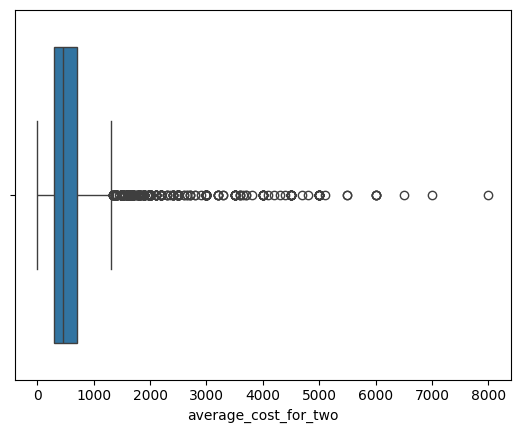

In [156]:
sns.boxplot(x='average_cost_for_two', data=df7)

In [157]:
df7.query('rating_votes > 500')

price_range                        name  \
0                3            Hauz Khas Social   
1                3  Qubitos - The Terrace Cafe   
2                2             The Hudson Cafe   
3                3           Summer House Cafe   
4                3                 38 Barracks   
...            ...                         ...   
25840            3         National Highway 44   
25841            3   Hinglish - Cafe Beach Bar   
25847            2             The Burger Club   
25848            4           Spaghetti Kitchen   
25971            2                  Rajasthali   

                                                cuisines  cuisine_count  \
0           [Continental, American, Asian, North Indian]              4   
1      [Thai, European, Mexican, North Indian, Chines...              6   
2                  [Cafe, Italian, Continental, Chinese]              4   
3                                 [Italian, Continental]              2   
4               [North Indian, Italian, Asian, American]              4   
...                                                  ...            ...   
25840  [Kashmiri, North Indian, Mughlai, South Indian...              6   
25841               [Continental, North Indian, Italian]              3   
25847                                [Burger, Fast Food]              2   
25848                                          [Italian]              1   
25971                             [Gujarati, Rajasthani]              2   

            city  rating  rating_votes currency  average_cost_for_two  \
0      New Delhi     4.3          7931      Rs.                  1600   
1      New Delhi     4.5           778      Rs.                  1500   
2      New Delhi     4.4          1537      Rs.                   850   
3      New Delhi     4.1          1823      Rs.                  1850   
4      New Delhi     4.4           840      Rs.                  1600   
...          ...     ...           ...      ...                   ...   
25840  New Delhi     4.4           676      Rs.                  1100   
25841  New Delhi     3.7           792      Rs.                  1600   
25847  New Delhi     3.9           606      Rs.                   500   
25848  New Delhi     3.8           601      Rs.                  2000   
25971    Gurgaon     2.9           501      Rs.                   750   

                                          sorted_cuisine numbered_cuisine  
0      ['American', 'Asian', 'Continental', 'North In...             1203  
1      ['Cafe', 'Chinese', 'European', 'Mexican', 'No...           875634  
2          ['Cafe', 'Chinese', 'Continental', 'Italian']             8709  
3                             ['Continental', 'Italian']               09  
4       ['American', 'Asian', 'Italian', 'North Indian']             1293  
...                                                  ...              ...  
25840  ['Gujarati', 'Kashmiri', 'Maharashtrian', 'Mug...      68765412315  
25841         ['Continental', 'Italian', 'North Indian']              093  
25847                            ['Burger', 'Fast Food']             2514  
25848                                        ['Italian']                9  
25971                         ['Gujarati', 'Rajasthani']             6849  

[502 rows x 11 columns]

In [158]:
df7.query('average_cost_for_two < 1000 and average_cost_for_two > 600 ')

price_range                     name  \
2                2          The Hudson Cafe   
5                2            Spezia Bistro   
10               2          Cafeteria & Co.   
30               2         India Restaurant   
32               2         Santa's Fantasea   
...            ...                      ...   
27475            2            Pind Balluchi   
27725            2              #Urban Café   
27970            2  Hotel Green View Palace   
28111            2          Punjabi Pakwaan   
28122            2          The Bakery Mart   

                                        cuisines  cuisine_count       city  \
2          [Cafe, Italian, Continental, Chinese]              4  New Delhi   
5          [Cafe, Continental, Chinese, Italian]              4  New Delhi   
10                        [Continental, Mexican]              2  New Delhi   
30     [Biryani, North Indian, Chinese, Mughlai]              4    Kolkata   
32                            [Seafood, Chinese]              2    Kolkata   
...                                          ...            ...        ...   
27475           [North Indian, Chinese, Mughlai]              3      Noida   
27725           [North Indian, Chinese, Italian]              3      Noida   
27970      [North Indian, Chinese, South Indian]              3      Noida   
28111           [North Indian, Mughlai, Chinese]              3      Noida   
28122                                   [Bakery]              1      Noida   

       rating  rating_votes currency  average_cost_for_two  \
2         4.4          1537      Rs.                   850   
5         4.6          1071      Rs.                   900   
10        4.6          1136      Rs.                   900   
30        4.6          1219      Rs.                   800   
32        4.2          2584      Rs.                   800   
...       ...           ...      ...                   ...   
27475     2.9             7      Rs.                   900   
27725     3.3            49      Rs.                   650   
27970     3.3           163      Rs.                   700   
28111     3.1            45      Rs.                   800   
28122     3.3             1      Rs.                   800   

                                          sorted_cuisine numbered_cuisine  
2          ['Cafe', 'Chinese', 'Continental', 'Italian']             8709  
5          ['Cafe', 'Chinese', 'Continental', 'Italian']             8709  
10                            ['Continental', 'Mexican']               06  
30     ['Biryani', 'Chinese', 'Mughlai', 'North Indian']           197123  
32                                ['Chinese', 'Seafood']              721  
...                                                  ...              ...  
27475             ['Chinese', 'Mughlai', 'North Indian']             7123  
27725             ['Chinese', 'Italian', 'North Indian']              793  
27970        ['Chinese', 'North Indian', 'South Indian']             7315  
28111             ['Chinese', 'Mughlai', 'North Indian']             7123  
28122                                         ['Bakery']               24  

[1174 rows x 11 columns]

In [159]:
df7.query('average_cost_for_two < 100')

price_range                             name  \
366              1                       UrbanCrave   
371              1    Atmosphere Grill Cafe Sheesha   
390              1                   The BrewMaster   
581              1                  Sheroes Hangout   
585              1                   Chapter 1 Cafe   
587              1      The Latitude - Radisson Blu   
614              1             BMG - All Day Dining   
681              1                  VNS Live Studio   
683              1               Deena Chat Bhandar   
5319             1    Pandit Ved Prakash Lemon Wale   
5322             1        Jung Bahadur Kachori Wala   
5503             1               Sharma Kachoriwala   
6062             1           Aggarwal Confectionary   
12995            1         Yadav Ji Chholey Bhature   
13962            1                Special Tea Point   
16781            1  Famous Parantha and Poori Sabzi   
16784            1                  Sweets n Treats   
16929            1                 Pakode Ki Dukaan   
17025            1      Raju De Special Paneer Wale   
17304            1       Ram Ram Ji Kachori Bhandar   
17311            1                           Freezy   
17368            1              Shahi Kachauri Wale   
19037            1         Indian Special Hot Momos   
21081            1                Front Food Corner   
22541            1                   Student Corner   
24407            1                      Ratan Singh   
24470            1                 Preet Fast Foods   
24679            1              Delhi Chaat Bhandar   
24864            1                    Duggal Snacks   
25506            1              Shri Ram Poori Wale   
25835            1                   Shree Raja Ram   
25892            1                   Shahi Kachauri   
25899            1             Aggarwal Jalebi Wale   

                                                cuisines  cuisine_count  \
366    [Cafe, Continental, Desserts, Ice Cream, Itali...              6   
371                       [Indian, Chinese, Continental]              3   
390                     [North Indian, Chinese, Italian]              3   
581                        [Cafe, North Indian, Chinese]              3   
585    [Cafe, Italian, Mexican, North Indian, Contine...              5   
587                 [North Indian, Chinese, Continental]              3   
614                   [Chinese, North Indian, Fast Food]              3   
681                              [Chinese, North Indian]              2   
683                                        [Street Food]              1   
5319                            [Beverages, Street Food]              2   
5322                                       [Street Food]              1   
5503                                       [Street Food]              1   
6062                               [Street Food, Bakery]              2   
12995                                      [Street Food]              1   
13962                        [Street Food, North Indian]              2   
16781                                     [North Indian]              1   
16784                                      [Street Food]              1   
16929                                      [Street Food]              1   
17025                                     [North Indian]              1   
17304                                      [Street Food]              1   
17311                                        [Ice Cream]              1   
17368                                      [Street Food]              1   
19037                                          [Chinese]              1   
21081                                     [North Indian]              1   
22541                                        [Fast Food]              1   
24407                                           [Mithai]              1   
24470                                      [Street Food]              1   
24679                               

In [160]:
df7.query('cuisine_count == 7 and average_cost_for_two <900')

price_range            name  \
1442             1      Haldiram's   
5305             2     Bikanervala   
5438             2      Haldiram's   
5553             2     Bikanervala   
5671             2      Haldiram's   
6691             2     Bikanervala   
7062             2      Haldiram's   
7122             2         Nuterro   
7948             2       InnerChef   
8145             2      Haldiram's   
9179             2      Haldiram's   
12185            2  Nathu's Sweets   
13555            2      Haldiram's   
16585            2      Haldiram's   
17285            2      Haldiram's   
18268            2      Haldiram's   
21226            2      Haldiram's   
27200            2  Nathu's Sweets   
27239            2      Haldiram's   

                                                cuisines  cuisine_count  \
1442   [North Indian, South Indian, Chinese, Street F...              7   
5305   [North Indian, South Indian, Fast Food, Street...              7   
5438   [North Indian, South Indian, Chinese, Street F...              7   
5553   [Mithai, Street Food, North Indian, South Indi...              7   
5671   [North Indian, South Indian, Chinese, Street F...              7   
6691   [North Indian, South Indian, Fast Food, Street...              7   
7062   [North Indian, South Indian, Chinese, Street F...              7   
7122   [Healthy Food, Continental, Juices, Beverages,...              7   
7948   [North Indian, South Indian, Italian, Continen...              7   
8145   [North Indian, South Indian, Chinese, Street F...              7   
9179   [North Indian, South Indian, Chinese, Street F...              7   
12185  [North Indian, South Indian, Chinese, Street F...              7   
13555  [North Indian, South Indian, Chinese, Street F...              7   
16585  [North Indian, South Indian, Chinese, Street F...              7   
17285  [North Indian, South Indian, Chinese, Street F...              7   
18268  [North Indian, South Indian, Chinese, Street F...              7   
21226  [North Indian, South Indian, Chinese, Street F...              7   
27200  [North Indian, South Indian, Chinese, Street F...              7   
27239  [North Indian, South Indian, Chinese, Street F...              7   

            city  rating  rating_votes currency  average_cost_for_two  \
1442   New Delhi     3.6           195      Rs.                   300   
5305   New Delhi     2.8            42      Rs.                   550   
5438   New Delhi     3.9           444      Rs.                   600   
5553   New Delhi     3.2            63      Rs.                   550   
5671   New Delhi     3.7           262      Rs.                   550   
6691   New Delhi     3.2           129      Rs.                   550   
7062     Gurgaon     3.6           185      Rs.                   600   
7122     Gurgaon     4.0           101      Rs.                   600   
7948       Noida     3.3            10      Rs.                   500   
8145       Noida     3.6           301      Rs.                   600   
9179   Ghaziabad     3.6           187      Rs.                   600   
12185  New Delhi     3.3           173      Rs.                   600   
13555  New Delhi     3.7           134      Rs.                   600   
16585  New Delhi     3.5            88      Rs.                   600   
17285  New Delhi     3.5           217      Rs.                   600   
18268    Gurgaon     3.6           315      Rs.                   600   
21226  New Delhi     3.8           472      Rs.                   600   
27200      Noida     2.5           211      Rs.                   600   
27239      Noida     3.5           169      Rs.                   600   

                                          sorted_cuisine numbered_cuisine  
1442   ['Chinese', 'Desserts', 'Fast Food', 'Mithai',...     720146031522  
5305   ['Chinese', 'Desserts', 'Fast Food', 'Mithai',...     720146031522  
5438   ['Chinese', 'Desserts', 'Fast Food', 'Mithai',...

In [161]:
df7.query('cuisine_count == 5')

price_range                              name  \
6                4  Manhattan Brewery & Bar Exchange   
72               1                        Eat Street   
108              3             The Fisherman's Wharf   
136              3                     Kaidi Kitchen   
146              3                           Bar Bar   
...            ...                               ...   
26137            1                     Cafe #22hours   
26220            1                   Truffle Tangles   
26347            2                           Hooters   
26364            2                             buéno   
27198            4         Americana Kitchen and Bar   

                                                cuisines  cuisine_count  \
6      [Finger Food, American, Continental, North Ind...              5   
72     [North Indian, Chinese, Italian, Street Food, ...              5   
108          [Seafood, Continental, Goan, Asian, Andhra]              5   
136      [Italian, Mexican, Chinese, Thai, North Indian]              5   
146     [Cafe, Chinese, Thai, North Indian, Continental]              5   
...                                                  ...            ...   
26137  [North Indian, South Indian, Chinese, Healthy ...              5   
26220  [Bakery, Desserts, North Indian, Bengali, Sout...              5   
26347  [Continental, Mexican, Fast Food, North Indian...              5   
26364    [Healthy Food, Cafe, Desserts, Italian, Bakery]              5   
27198  [American, Tex-Mex, Italian, Mexican, North In...              5   

            city  rating  rating_votes currency  average_cost_for_two  \
6        Gurgaon     4.6          2093      Rs.                  2000   
72     Bangalore     4.3           753      Rs.                   400   
108    Hyderabad     3.8           144      Rs.                  1500   
136      Chennai     4.0          1820      Rs.                  1500   
146      Lucknow     4.0            79      Rs.                  1000   
...          ...     ...           ...      ...                   ...   
26137    Gurgaon     3.2            47      Rs.                   350   
26220    Gurgaon     3.5            37      Rs.                   300   
26347  New Delhi     3.1             6      Rs.                   500   
26364    Gurgaon     3.8            99      Rs.                   650   
27198      Noida     2.4           221      Rs.                  2000   

                                          sorted_cuisine numbered_cuisine  
6      ['American', 'Continental', 'Finger Food', 'It...           101093  
72     ['Chinese', 'Desserts', 'Italian', 'North Indi...          7209322  
108    ['Andhra', 'Asian', 'Continental', 'Goan', 'Se...         39204121  
136    ['Chinese', 'Italian', 'Mexican', 'North India...            79634  
146    ['Cafe', 'Chinese', 'Continental', 'North Indi...            87034  
...                                                  ...              ...  
26137  ['Bakery', 'Chinese', 'Healthy Food', 'North I...         24727315  
26220  ['Bakery', 'Bengali', 'Desserts', 'North India...        241720315  
26347  ['Chinese', 'Continental', 'Fast Food', 'Mexic...           701463  
26364  ['Bakery', 'Cafe', 'Desserts', 'Healthy Food',...         24820279  
27198  ['American', 'Italian', 'Mexican', 'North Indi...           196318  

[155 rows x 11 columns]

NameError: name 'df7' is not defined

#Normalization

In [163]:
df8 = df7.drop(['name' , 'city', 'cuisines', 'currency', 'sorted_cuisine', 'numbered_cuisine'],axis='columns')

In [164]:
#encoding data
'''
le = LabelEncoder()
le_col = ['sorted_cuisine']

label_encoders = {}
le_col_val = {}

for col in le_col:
  le = LabelEncoder()
  le.fit(df7[col])

  le_col_val[col] = dict(zip(le.classes_, le.transform(le.classes_)))

  label_encoders[col] = le#save the model

  df7[col] = le.transform(df7[col])
  print(label_encoders[col].classes_)
  #print(le_col_val)

'''

"\nle = LabelEncoder()\nle_col = ['sorted_cuisine']\n\nlabel_encoders = {}\nle_col_val = {}\n\nfor col in le_col:\n  le = LabelEncoder()\n  le.fit(df7[col])\n\n  le_col_val[col] = dict(zip(le.classes_, le.transform(le.classes_)))\n\n  label_encoders[col] = le#save the model\n\n  df7[col] = le.transform(df7[col])\n  print(label_encoders[col].classes_)\n  #print(le_col_val)\n\n"

In [ ]:
#print(le_col_val)

NameError: name 'le_col_val' is not defined

In [166]:
df8.isnull().sum()
#df7 - label encoded for minmax and mode training

price_range             0
cuisine_count           0
rating                  0
rating_votes            0
average_cost_for_two    0
dtype: int64

#Minmax scaling

In [167]:
df8.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8652 entries, 0 to 28490
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   price_range           8652 non-null   int64  
 1   cuisine_count         8652 non-null   int64  
 2   rating                8652 non-null   float64
 3   rating_votes          8652 non-null   int64  
 4   average_cost_for_two  8652 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 663.6 KB


In [168]:
df8['average_cost_for_two'] = df8.pop('average_cost_for_two')

In [169]:
scaler = MinMaxScaler()
scaler2 = MinMaxScaler() #only for average_cost_for_two column
#input param = array-like of shape (n_samples, n_features)
df_for_scalar = df8.drop('average_cost_for_two', axis = 'columns')

df_minmax_scaled = df8.copy()

scaler.fit(df_for_scalar[df_for_scalar.columns])


minmaxscaler = scaler

#transform valus
df_minmax_scaled[df_for_scalar.columns] = scaler.transform(df_for_scalar[df_for_scalar.columns])

display(df_minmax_scaled)



price_range  cuisine_count    rating  rating_votes  \
0             0.50       0.428571  0.806452      0.725327   
1             0.50       0.714286  0.870968      0.071069   
2             0.25       0.428571  0.838710      0.140492   
3             0.50       0.142857  0.741935      0.166651   
4             0.50       0.428571  0.838710      0.076740   
...            ...            ...       ...           ...   
28124         0.25       0.714286  0.677419      0.011982   
28125         0.50       0.285714  0.096774      0.001921   
28487         0.00       0.000000  0.451613      0.003567   
28488         0.00       0.142857  0.451613      0.003201   
28490         0.00       0.285714  0.580645      0.010061   

       average_cost_for_two  
0                      1600  
1                      1500  
2                       850  
3                      1850  
4                      1600  
...                     ...  
28124                   550  
28125                  1400  
28487                   200  
28488                   100  
28490                   450  

[8652 rows x 5 columns]

##Correlation Heatmap

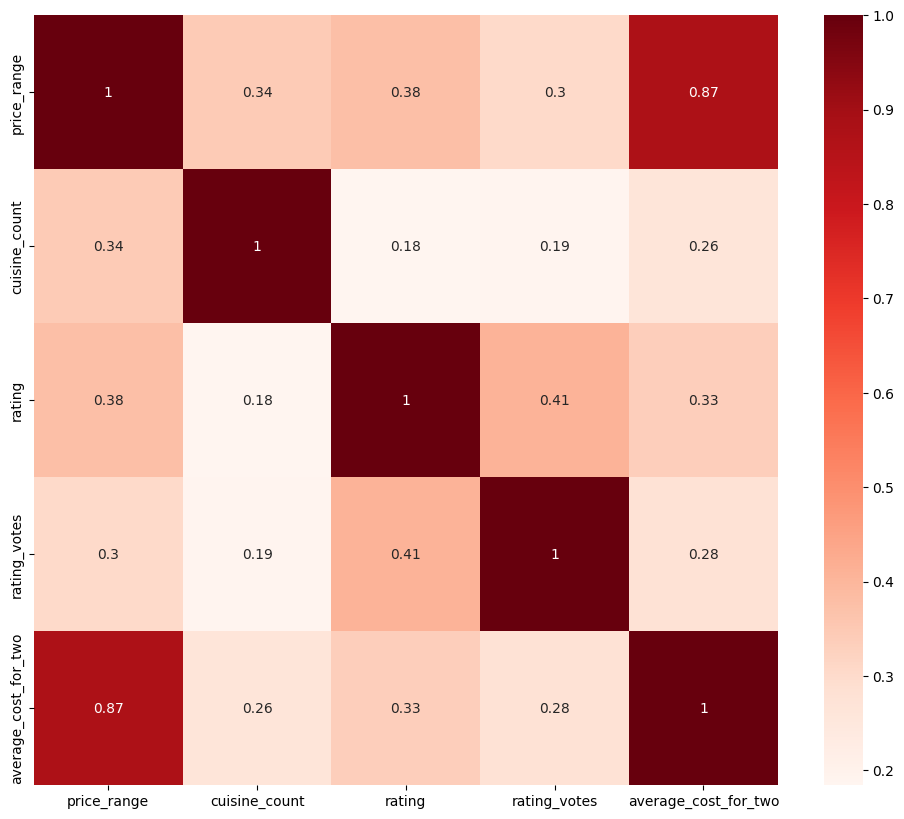

In [170]:
plt.figure(figsize=(12,10))
cor = df_minmax_scaled.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

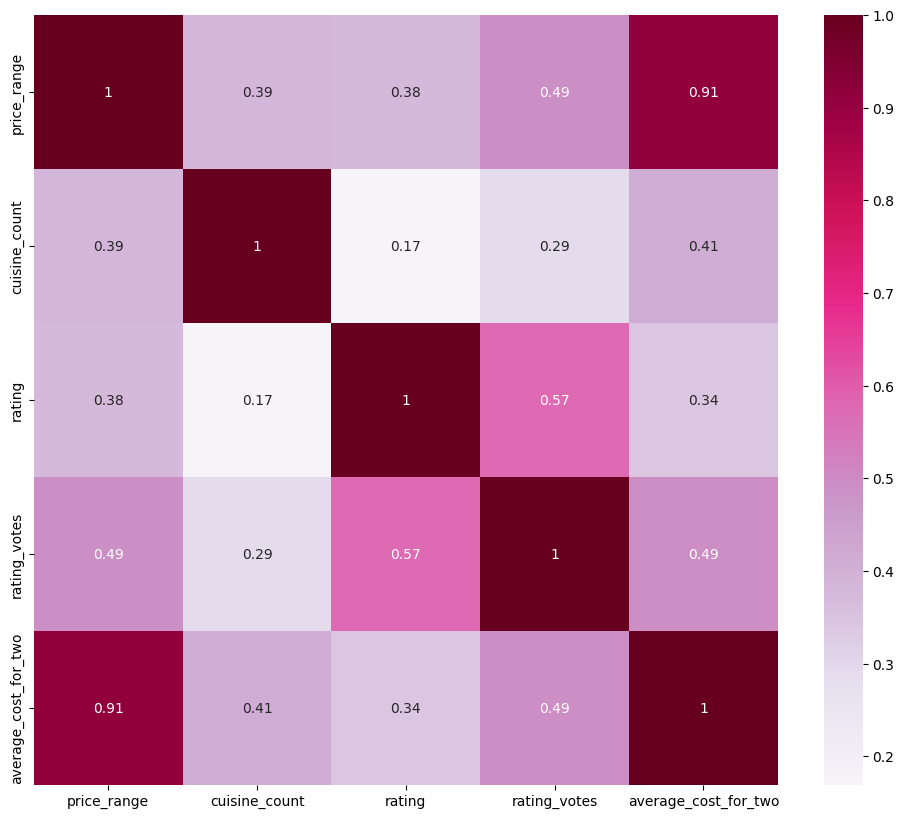

In [171]:
plt.figure(figsize=(12,10))
cor = df_minmax_scaled.corr(method = 'spearman')
sns.heatmap(cor, annot=True, cmap=plt.cm.PuRd)
plt.show()

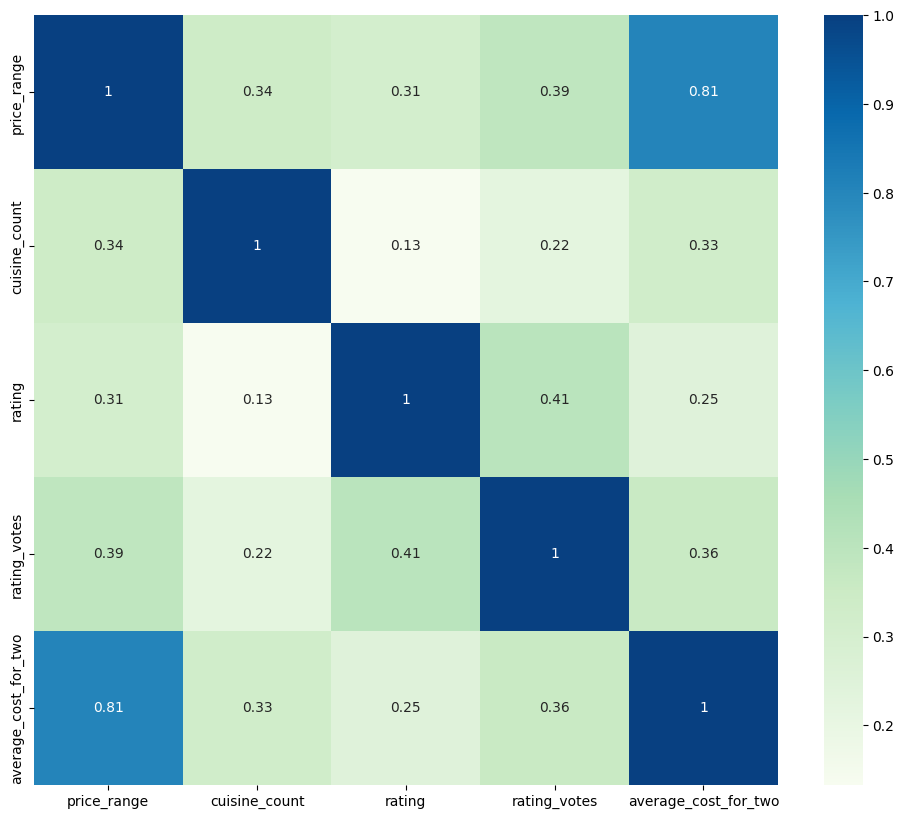

In [172]:
plt.figure(figsize=(12,10))
cor = df_minmax_scaled.corr(method = 'kendall')
sns.heatmap(cor, annot=True, cmap=plt.cm.GnBu)
plt.show()

#Model Training

In [173]:

X = df_minmax_scaled.drop('average_cost_for_two', axis = 1)
Y = df_minmax_scaled['average_cost_for_two']

X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y, test_size = 0.3, random_state = 43)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(6056, 4)
(2596, 4)
(6056,)
(2596,)


In [174]:
from sklearn import metrics
# Model creation, prediction

def training(model,X_train,y_train,X_test,y_test):

  model.fit(X_train, y_train)
  #print('Coefficients: \n', model.coef_)
  train_y_pred = model.predict(X_train)
  test_y_pred = model.predict(X_test)

  xytest = y_test - test_y_pred
  xytestper = (xytest/Y_test)*100
  xytestper

  xytrain = y_train - train_y_pred
  xytrainper = (xytrain/Y_train)*100
  xytrainper



  print('Test data metrics')
  print('MAE:', metrics.mean_absolute_error(y_test, test_y_pred))
  print('MSE:', metrics.mean_squared_error(y_test, test_y_pred))
  print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, test_y_pred)))
  print('R2:',metrics.explained_variance_score(y_test, test_y_pred))
  print('Error % :', xytestper.sum()/xytestper.shape[0], ' %')

  print('\nTrain data metrics')
  print('MAE:', metrics.mean_absolute_error(y_train, train_y_pred))
  print('MSE:', metrics.mean_squared_error(y_train, train_y_pred))
  print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, train_y_pred)))
  print('R2:',metrics.explained_variance_score(y_train, train_y_pred))

  print('Error % :', xytrainper.sum()/xytrainper.shape[0], ' %')



In [175]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

training(lm,X_train, Y_train,X_test,Y_test)

Test data metrics
MAE: 185.6502204160652
MSE: 94901.06791659517
RMSE: 308.0601693120926
R2: 0.7725597711355287
Error % : -inf  %

Train data metrics
MAE: 176.6140238589071
MSE: 78284.92094810086
RMSE: 279.79442622772325
R2: 0.7611062421104751
Error % : -inf  %


In [176]:

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 300, max_features = 'log2', max_depth = 5, random_state = 18)

training(rf,X_train, Y_train,X_test,Y_test)


Test data metrics
MAE: 132.7001275758172
MSE: 45384.89125797321
RMSE: 213.03730015650595
R2: 0.8913060776469485
Error % : -inf  %

Train data metrics
MAE: 120.31312439130794
MSE: 34330.733286746625
RMSE: 185.28554527201152
R2: 0.8952370895872706
Error % : -inf  %


In [177]:

from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(max_depth=5)

training(dt,X_train, Y_train,X_test,Y_test)

Test data metrics
MAE: 128.19724120777366
MSE: 53063.42071958423
RMSE: 230.35498848426147
R2: 0.8727176919828937
Error % : -inf  %

Train data metrics
MAE: 114.61648629525861
MSE: 31769.240672653683
RMSE: 178.23927926429036
R2: 0.9030531908613866
Error % : -inf  %


In [178]:
test_y_pred = dt.predict(X_test)

In [179]:
test_y_pred

array([ 633.14285714, 1189.13043478,  273.15715292, ..., 2079.29936306,
        273.15715292,  645.97315436])

In [180]:
Y_test

17792     600
7070     1500
11426     250
16952     350
8913      400
         ... 
16644     500
224       600
13114    2500
9195      200
220       650
Name: average_cost_for_two, Length: 2596, dtype: int64

In [181]:
test_y_pred_df = pd.DataFrame([test_y_pred])


In [182]:
test_y_pred_df.T

0
0      633.142857
1     1189.130435
2      273.157153
3      273.157153
4      363.106061
...           ...
2591   607.684989
2592   645.973154
2593  2079.299363
2594   273.157153
2595   645.973154

[2596 rows x 1 columns]

In [183]:

xy = Y_test - test_y_pred
xyper = round((xy/Y_test)*100,2)
xyper




17792    -5.52
7070     20.72
11426    -9.26
16952    21.96
8913      9.22
         ...  
16644   -21.54
224      -7.66
13114    16.83
9195    -36.58
220       0.62
Name: average_cost_for_two, Length: 2596, dtype: float64

In [184]:
count = np.isinf(xyper).values.sum()
print("It contains " + str(count) + " infinite values")

It contains 2 infinite values


In [185]:
X_test.loc[581]

price_range      0.000000
cuisine_count    0.285714
rating           1.000000
rating_votes     0.006951
Name: 581, dtype: float64

In [186]:
lm.predict([[0, 0.285, 1.00, 0.00695]])

c:\Users\ashfaq.ahamed\Documents\projects1\zomato\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([179.1607052])

In [187]:
xyper.sort_values(ascending = False)

13911     56.04
7089      56.04
2981      56.04
17090     50.55
5937      50.55
          ...  
25506   -446.31
6062    -446.31
25892   -446.31
581        -inf
371        -inf
Name: average_cost_for_two, Length: 2596, dtype: float64

In [189]:
print(xyper.sum()/xyper.shape[0])

-inf


In [191]:
xyper.shape[0]

2596

In [192]:
xyper.sum()/xyper.shape[0]

np.float64(-inf)

In [193]:
from sklearn.metrics import mean_absolute_error as mae
k = mae(test_y_pred, Y_test)
print('Training Mean Absolute Error', k )

Training Mean Absolute Error 128.19724120777366


In [194]:
'''
import pickle
with open('lm.pkl', 'wb') as f:
    pickle.dump(lm, f)

with open('scaler.pkl', 'wb') as f:
    pickle.dump(minmaxscaler, f)

with open('le.pkl', 'wb') as f:
    pickle.dump(label_encoders, f)
'''

"\nimport pickle\nwith open('lm.pkl', 'wb') as f:\n    pickle.dump(lm, f)\n\nwith open('scaler.pkl', 'wb') as f:\n    pickle.dump(minmaxscaler, f)\n\nwith open('le.pkl', 'wb') as f:\n    pickle.dump(label_encoders, f)\n"

In [195]:
import pickle
with open('lm.pkl', 'wb') as f:
    pickle.dump(lm, f)

with open('scaler.pkl', 'wb') as f:
    pickle.dump(minmaxscaler, f)

with open('dt.pkl', 'wb') as f:
    pickle.dump(dt, f)

with open('rf.pkl', 'wb') as f:
    pickle.dump(rf, f)

testing


In [196]:
df2

price_range                           name  \
0                3               Hauz Khas Social   
1                3     Qubitos - The Terrace Cafe   
2                2                The Hudson Cafe   
3                3              Summer House Cafe   
4                3                    38 Barracks   
...            ...                            ...   
29746            1                  Rupes Burgers   
29747            1          Outer Limits Fun Zone   
29749            3  Sandpiper Restaurant & Lounge   
29750            3                Texas Roadhouse   
29751            1                 Riverwalk Cafe   

                                                cuisines       city  rating  \
0             Continental, American, Asian, North Indian  New Delhi     4.3   
1      Thai, European, Mexican, North Indian, Chinese...  New Delhi     4.5   
2                    Cafe, Italian, Continental, Chinese  New Delhi     4.4   
3                                   Italian, Continental  New Delhi     4.1   
4                 North Indian, Italian, Asian, American  New Delhi     4.4   
...                                                  ...        ...     ...   
29746                                  Burger, Fast Food  Pocatello     3.7   
29747                            Burger, Pizza, Sandwich  Pocatello     3.5   
29749                           American, Seafood, Steak  Pocatello     3.6   
29750                               American, BBQ, Steak  Pocatello     3.5   
29751                                        Asian, Thai  Pocatello     3.6   

       rating_votes currency  average_cost_for_two  
0              7931      Rs.                  1600  
1               778      Rs.                  1500  
2              1537      Rs.                   850  
3              1823      Rs.                  1850  
4               840      Rs.                  1600  
...             ...      ...                   ...  
29746           104        $                    10  
29747            57        $                    10  
29749            85        $                    40  
29750            83        $                    45  
29751            91        $                    10  

[9553 rows x 8 columns]

In [197]:
df_minmax_scaled

price_range  cuisine_count    rating  rating_votes  \
0             0.50       0.428571  0.806452      0.725327   
1             0.50       0.714286  0.870968      0.071069   
2             0.25       0.428571  0.838710      0.140492   
3             0.50       0.142857  0.741935      0.166651   
4             0.50       0.428571  0.838710      0.076740   
...            ...            ...       ...           ...   
28124         0.25       0.714286  0.677419      0.011982   
28125         0.50       0.285714  0.096774      0.001921   
28487         0.00       0.000000  0.451613      0.003567   
28488         0.00       0.142857  0.451613      0.003201   
28490         0.00       0.285714  0.580645      0.010061   

       average_cost_for_two  
0                      1600  
1                      1500  
2                       850  
3                      1850  
4                      1600  
...                     ...  
28124                   550  
28125                  1400  
28487                   200  
28488                   100  
28490                   450  

[8652 rows x 5 columns]

In [198]:
dfx = df8.drop('average_cost_for_two', axis = 'columns')


In [199]:
dfx.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8652 entries, 0 to 28490
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price_range    8652 non-null   int64  
 1   cuisine_count  8652 non-null   int64  
 2   rating         8652 non-null   float64
 3   rating_votes   8652 non-null   int64  
dtypes: float64(1), int64(3)
memory usage: 596.0 KB


In [200]:
df8.iloc[300]

price_range                3.0
cuisine_count              3.0
rating                     3.9
rating_votes              80.0
average_cost_for_two    1400.0
Name: 300, dtype: float64

In [201]:
input = [3, 3, 3.9, 80]
input_data = pd.DataFrame(columns = dfx.columns)
input_data


Empty DataFrame
Columns: [price_range, cuisine_count, rating, rating_votes]
Index: []

In [202]:
input_data.loc[0] = input
input_data

price_range  cuisine_count  rating  rating_votes
0          3.0            3.0     3.9          80.0

In [203]:
input_data

price_range  cuisine_count  rating  rating_votes
0          3.0            3.0     3.9          80.0

In [204]:
input_data[input_data.columns] = minmaxscaler.transform(input_data[input_data.columns])



In [205]:
input_data

price_range  cuisine_count    rating  rating_votes
0          0.5       0.285714  0.677419      0.007226

In [214]:
predicted_val = lm.predict(input_data)

In [207]:
predicted_val = rf.predict(input_data)

In [208]:
predicted_val = dt.predict(input_data)

In [216]:
input_data['pred'] = predicted_val

In [217]:
input_data

price_range  cuisine_count    rating  rating_votes        pred
0          0.5       0.285714  0.677419      0.007226  1336.51459

In [215]:
s1 = predicted_val[0]
s1

np.float64(1336.5145903076502)

#Push data to AWS RDS

Push to AWS RDS

In [210]:

import mysql.connector
import pandas as pd
from sqlalchemy import create_engine

In [211]:


''''''
# AWS RDS MySQL connection details
username = 'admin'
password = 'adminpassword'
hostname = 'zomato-db.c78oq0qc6csc.ap-south-1.rds.amazonaws.com'
port = '3306'  # Default port for MySQL
dbname = 'zomatodb'

# Create connection string
connection_string = f'mysql+mysqldb://{username}:{password}@{hostname}:{port}/{dbname}'

# Create SQLAlchemy engine
engine = create_engine(connection_string)

# Push DataFrame to a table in MySQL (e.g., "my_table")
#df.to_sql('zom_table', engine, index=False, if_exists='replace')
''''''


''

In [212]:
#df.to_sql('zom_table', engine, index=False, if_exists='replace')

In [213]:
from mysql.connector import (connection)

cnx = connection.MySQLConnection(user='admin', password='adminpassword',
                                 host='zomato-db.c78oq0qc6csc.ap-south-1.rds.amazonaws.com'
                                )
#cnx.close()

InterfaceError: 2003: Can't connect to MySQL server on 'zomato-db.c78oq0qc6csc.ap-south-1.rds.amazonaws.com:3306' (Errno 11001: getaddrinfo failed)

In [ ]:
mycursor = cnx.cursor()
mycursor.execute( """USE zomatodb""")


In [ ]:
mycursor.nextset()

In [ ]:
mycursor.execute( """SHOW databases""")
records = mycursor.fetchall()
records


In [ ]:
mycursor.execute( """SHOW tables""")
records = mycursor.fetchall()
records


In [ ]:
def row2list(c):
    ilist=[]
    for i in c:
        ilist.append(*i)
    return ilist

In [ ]:
mycursor.execute("""SELECT DISTINCT city FROM zom_table""")
records = mycursor.fetchall()
records

In [ ]:
querycityname = 'Kanpur'
querycuisinename = '%continental%'
querylocalityname = 'Swaroop Nagar'


In [ ]:
mycursor.execute(f"SELECT DISTINCT locality FROM  zom_table WHERE city = '{querycityname}'")
records = mycursor.fetchall()
records
locality_option = row2list(records)
locality_option


In [ ]:
mycursor.execute(f"SELECT DISTINCT locality FROM  zom_table WHERE city = '{querycityname}' && cuisines like '{querycuisinename}'")
records = mycursor.fetchall()
records
cuisine_option = row2list(records)
cuisine_option


In [ ]:
mycursor.execute(f"SELECT DISTINCT cuisines FROM  zom_table WHERE city = '{querycityname}' && locality like '{querylocalityname}'")
records = mycursor.fetchall()
records
cuisine_option = row2list(records)
cuisine_option


In [ ]:
mycursor.execute(f"SELECT DISTINCT cuisines FROM  zom_table")
cuisinenames = row2list(mycursor.fetchall())
cuisinenames

In [ ]:
clist=[]
for i in cuisinenames:
    cname = i.split(', ')
    clist.extend(cname)
clist = list(dict.fromkeys(clist))
print(clist)

In [ ]:
len(clist)

In [ ]:
type(cuisinenames)

In [ ]:
df.index

In [ ]:
with open('cuisine_dict.pkl', 'wb') as cd:
    pickle.dump(cuisine_dict, cd)

In [ ]:
df_minmax_scaled

cuisine_count  price_range    rating  rating_votes  \
31          0.285714     0.666667  0.795918         0.652   
43          0.071429     0.666667  0.775510         0.292   
44          0.642857     0.666667  0.775510         0.362   
47          0.642857     0.333333  0.693878         0.340   
50          0.357143     0.333333  0.938776         0.826   
...              ...          ...       ...           ...   
29746       0.214286     0.000000  0.755102         0.208   
29747       0.214286     0.000000  0.714286         0.114   
29749       0.357143     0.666667  0.734694         0.170   
29750       0.357143     0.666667  0.714286         0.166   
29751       0.142857     0.000000  0.734694         0.182   

       average_cost_for_two  
31                     1000  
43                     1000  
44                     1000  
47                      850  
50                      500  
...                     ...  
29746                    10  
29747                    10  
29749                    40  
29750                    45  
29751                    10  

[6610 rows x 5 columns]

In [ ]:
df_minmax_scaled.sort_values(by = 'rating_votes', ascending=False)

In [ ]:
df8.shape

(8652, 5)

In [ ]:
df2.shape

(9577, 8)

In [ ]:
9577-8652

925

In [ ]:
925/9577 * 100

9.658556959381851

Model Training